# Exercise 1. Second-order optimization methods

In this exercise, we will use $||w_{k+1} - w_k|| < eps $ as a stopping criterion, since a small difference between consecutive updates indicates convergence.
We will also store a dictionary of results:
- a list of all iterates (`w_sols`)
- a list of the objective values at each iteration (`obj_vals`)
- the number of function evaluation (`num_func_eval`)
- the number of gradient evaluation (`num_grad_eval`)
- the number of hessian evaluation (`num_hess_eval`)
- the number of iterations (`num_iterations`)
- a boolean indicating if the method has converged or not before `max_iter` iterations (`has_converged`)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import norm

## 1.1 Newton's method

Starting from a point $w_0 \in \mathbb{R}^d$, the method generates a sequence $\{w_k\}_k$ from the following recursion:

$$w_{k+1} = w_k - [\nabla^2f(w_k)]^{-1} \nabla f(w_k)$$.


Remarks:
- Hessian matrix of $f$ at $w_k$ may not be invertible.
- If $f$ is strongly convex, Newton iteration is well defined because $\nabla^2f(w) > 0$ for any $w \in \mathbb{R}^d$.
- If $f$ is a strongly convex quadratic, Newton's method converges in one iteration.
- If $f$ is strongly convex, Newton's method converges at a local quadratic rate.

### __Implementation 1.1__ 
*Implement Newton’s method in its basic form. Your code should take $f$, $\nabla f$ and $\nabla^2 f$ as inputs.*

In [ ]:
def newton(f, grad_f, hess_f, w0, epsilon=1e-3, max_iter=100, verbose=False):

    # Initialisation
    wk = w0

    # Dict to store results
    results = {}
    results["w_sols"] = [w0] # Solution history
    results["obj_vals"] = [] # Objective value history
    results["num_func_eval"] = 0
    results["num_grad_eval"] = 0
    results["num_hess_eval"] = 0

    for k in range(max_iter):

        # Compute the objective value and add it to history
        fwk = f(wk)
        results["obj_vals"].append(fwk)

        # Plot relevant information if verbose=True
        if verbose:
            print(f'[{k}]: w={wk}, f(w)={fwk:.4e}')

        # Compute gradient and hessian
        gwk = grad_f(wk)
        hwk = hess_f(wk)
        results["num_grad_eval"] += 1
        results["num_hess_eval"] += 1
        
        # Update wk if problem is well-defined, i.e. the hessian is invertible
        try:
            inv_hwk = np.linalg.inv(hwk)    
        except Exception as e:
            print(f"Hessian matrix at w={wk} is not invertible.")
            results["has_converged"] = False
            results["num_iterations"] = k
            return results

        # Update iteration
        wk1 = wk - inv_hwk @ gwk

        # Stopping condition
        if norm(wk1-wk) < epsilon:
            print(f"Newton's method has converged in {k} iteration(s).")
            results["has_converged"] = True
            results["num_iterations"] = k
            return results

        # Overwrite wk
        wk = wk1

        # Add wk to history
        results["w_sols"].append(wk)

    print(f"Newton's method hasn't converged in {max_iter} iteration(s).")
    results["has_converged"] = False
    results["num_iterations"] = k
    return results

### __Question 1.1__ 

*We consider the following quadratic problem (3):*
$$\underset{\mathbf{w} \in \mathbb{R}^3}{minimize} \space q(\mathbf{w}) = 2(w_1 + w_2 + w_3 - 3)^2 + (w_1 - w_2)^2 + (w_2 - w_3)^2$$

*This problem is a strongly convex quadratic function, with a unique minimizer $\mathbf{w^*} = \begin{pmatrix}
1  \\
1  \\
1
\end{pmatrix}$*

*a) Write down the first iteration of Newton’s method for problem (3), and show that Newton’s method indeed converges in one iteration to the solution.*


We have $$ \nabla f \begin{pmatrix}
w_1  \\
w_2  \\
w_3
\end{pmatrix} ~= \begin{pmatrix}
6w_1 +2w_2 +4w_3 -12 \\
2w_1 +8w_2 +2w_3 -12 \\
4w_1 + 2w_2 +6w_3 -12 
\end{pmatrix}$$

and  $$ \nabla ^2 f \begin{pmatrix}
w_1  \\
w_2  \\
w_3
\end{pmatrix} ~= \begin{pmatrix}
6 & 2 & 4 \\
2 & 8 & 2 \\
4 & 2 & 6 
\end{pmatrix}$$,

and $$ \nabla ^2 f \begin{pmatrix}
w_1  \\
w_2  \\
w_3
\end{pmatrix} ~= \frac{1}{36} \begin{pmatrix}
11 & -1 & -7 \\
-1 & 5 & -1 \\
-7 & -1 & 11 
\end{pmatrix}$$

Let $w_0 \in \mathbb{R}^3$.

$$ w = w_0 - [\nabla^2 f(w_0)]^{-1}\nabla f(w_0)$$
$$= \begin{pmatrix}
w_1  \\
w_2  \\
w_3
\end{pmatrix} -  \frac{1}{36} \begin{pmatrix}
11 & -1 & -7 \\
-1 & 5 & -1 \\
-7 & -1 & 11 
\end{pmatrix} \times \begin{pmatrix}
6w_1 +2w_2 +4w_3 -12 \\
2w_1 +8w_2 +2w_3 -12 \\
4w_1 + 2w_2 +6w_3 -12 
\end{pmatrix}$$
$$= \begin{pmatrix}
w_1  \\
w_2  \\
w_3
\end{pmatrix} - \begin{pmatrix}
w_1-1  \\
w_2-1 \\
w_3-1
\end{pmatrix}$$
$$= \begin{pmatrix}
1  \\
1  \\
1
\end{pmatrix}$$

Finally, $$f(w) = 2(1+1+1-3)^2+(1-1)^2+(1-1)^2 = 0$$

The algorithm indeed converges to the solution in one iteration.

*b) Run the method starting from the origin and two other starting points of your choice. Do you indeed observe convergence in one iteration?*

Firstly, we implement the strongly convex quadratic function, its gradient and its hessian.

In [ ]:
def q(w):
    w1, w2, w3 = w
    return 2*(w1 + w2 + w3 - 3)**2 + (w1 - w2)**2 + (w2 -w3)**2

def grad_q(w):
    w1, w2, w3 = w
    return np.array([6*w1+2*w2+4*w3-12, 2*w1+8*w2+2*w3-12, 4*w1+2*w2+6*w3-12])

def hess_q(w):
    w1, w2, w3 = w
    return np.array([[6,2,4], [2,8,2], [4,2,6]])

Then we run the method from three starting points (the origin and two other points).

In [ ]:
# First starting point: origin
w0 = np.array([0,0,0])
results = newton(q, grad_q, hess_q, w0, verbose=True)

[0]: w=[0 0 0], f(w)=1.8000e+01
[1]: w=[1. 1. 1.], f(w)=1.9722e-30
Newton's method has converged in 1 iteration(s).


In [ ]:
# Second starting point
w0 = np.array([2,-1,10])
results = newton(q, grad_q, hess_q, w0, verbose=True)

[0]: w=[ 2 -1 10], f(w)=2.5800e+02
[1]: w=[1. 1. 1.], f(w)=3.1554e-29
Newton's method has converged in 1 iteration(s).


In [ ]:
# Third starting point
w0 = np.array([1000.43,-178.098,1])
results = newton(q, grad_q, hess_q, w0, verbose=True)

[0]: w=[ 1.00043e+03 -1.78098e+02  1.00000e+00], f(w)=2.7669e+06
[1]: w=[1. 1. 1.], f(w)=3.8774e-26
Newton's method has converged in 1 iteration(s).


We observe convergence in one iteration regardless of the starting point.

### __Question 1.2__ 
*We now consider the celebrated Rosenbrock function*

$$\underset{\mathbf{w} \in \mathbb{R}^2}{minimize} \space f(\mathbf{w}) = 100(w_2 - w_1^2)^2 + (1-w_1)^2$$


*a) Apply your implementation of Newton’s method to this problem starting from*

$$
\mathbf{w}_{01} = \begin{bmatrix}
-1.2  \\
1 
\end{bmatrix},
\space \mathit{and} \space \space
\mathbf{w}_{02} = \begin{bmatrix}
0  \\
\frac{1}{200} + 10^{-12} 
\end{bmatrix}.
$$

*Report your results and your observations. Does the method converge?*

Firstly, we implement the Rosenbrock function (noted $f$), its gradient and its hessian.

In [ ]:
def f(w):
    w1, w2 = w
    return 100*(w2-w1**2)**2 + (1-w1)**2

def grad_f(w):
    w1, w2 = w
    return np.array([-400*w1*(w2-w1**2)-2*(1-w1), 200*(w2-w1**2)])

def hess_f(w):
    w1, w2 = w
    return np.array([[800*w1**2-400*(w2-w1**2)+2, -400*w1], [-400*w1, 200]])

Let's run the method from $\mathbf{w}_{01}$ and $\mathbf{w}_{02}$.

In [ ]:
w01 = np.array([-1.2, 1])
results_w01_newton = newton(f, grad_f, hess_f, w01, verbose=True)

[0]: w=[-1.2  1. ], f(w)=2.4200e+01
[1]: w=[-1.1752809   1.38067416], f(w)=4.7319e+00
[2]: w=[ 0.76311487 -3.17503385], f(w)=1.4118e+03
[3]: w=[0.76342968 0.58282478], f(w)=5.5966e-02
[4]: w=[0.99999531 0.94402732], f(w)=3.1319e-01
[5]: w=[0.9999957  0.99999139], f(w)=1.8527e-11
Newton's method has converged in 5 iteration(s).


In [ ]:
w02 = np.array([0, 1/200 + 1e-12])
results_w02_newton = newton(f, grad_f, hess_f, w02, verbose=True)

[0]: w=[0.    0.005], f(w)=1.0025e+00
[1]: w=[-4.99999959e+09  0.00000000e+00], f(w)=6.2500e+40
[2]: w=[-4.99999959e+09  2.49999959e+19], f(w)=2.5000e+19
[3]: w=[-5.0000031e+09  2.5000031e+19], f(w)=2.5015e+19
[4]: w=[-5.0000031e+09  2.5000031e+19], f(w)=2.5000e+19
[5]: w=[-5.00000134e+09  2.50000134e+19], f(w)=2.5001e+19
[6]: w=[-5.00000134e+09  2.50000134e+19], f(w)=2.5000e+19
[7]: w=[-5.00000485e+09  2.50000485e+19], f(w)=2.5015e+19
[8]: w=[-5.00000485e+09  2.50000485e+19], f(w)=2.5000e+19
[9]: w=[-5.00000368e+09  2.50000368e+19], f(w)=2.5000e+19
[10]: w=[-5.00000366e+09  2.50000366e+19], f(w)=2.5000e+19
Hessian matrix at w=[-5.00000366e+09  2.50000366e+19] is not invertible.


The method does not always converge. As we can see above, the convergence depends on the choice of the starting point: the method has converged in 5 iterations when starting with $\mathbf{w}_{01}$ but not with $\mathbf{w}_{02}$, where the method was not well-defined after 10 iterations. The Hessian matrix depends on the value of evaluating point, so may not always be invertible.

*b) Could we run the method starting from the point $\mathbf{w}_{03} = \begin{bmatrix}
0  \\
0.005 
\end{bmatrix}$?*

*How does that illustrate that Newton’s method is local in nature?*

In [ ]:
w03 = np.array([0, 0.005])
results_w03_newton = newton(f, grad_f, hess_f, w03, verbose=True)

[0]: w=[0.    0.005], f(w)=1.0025e+00
Hessian matrix at w=[0.    0.005] is not invertible.


In [ ]:
w04 = np.array([0, 0.005 + 1e-7])
results_w04_newton = newton(f, grad_f, hess_f, w04, verbose=True)

[0]: w=[0.        0.0050001], f(w)=1.0025e+00
[1]: w=[-49999.99999967      0.        ], f(w)=6.2500e+20
[2]: w=[-5.0e+04  2.5e+09], f(w)=2.5001e+09
[3]: w=[ 1.07683445e-01 -2.50001077e+09], f(w)=6.2501e+20
[4]: w=[0.10768345 0.01159573], f(w)=7.9623e-01
[5]: w=[1.00000029 0.20377123], f(w)=6.3398e+01
[6]: w=[1.00000029 1.00000059], f(w)=8.5771e-14
Newton's method has converged in 6 iteration(s).


When starting from $\mathbf{w}_{03}$, the method is not well-defined from the first iteration, because the hessian is already singular. But with $\mathbf{w}_{04} = \begin{bmatrix}
0  \\
0.005 + 10^{-7}
\end{bmatrix}$, the method converges in 6 iterations.

The four starting point examples shows that Newton's method is *local* in nature in the sense that its convergence and well-definess depend strongly on the initial point. Some points will make the hessian invertible and some not, even if there are very close. For instance, $\mathbf{w}_{02}$, $\mathbf{w}_{03}$ and $\mathbf{w}_{04}$ are very close (their second component only differ by a small fraction), however they lead to different results: for $\mathbf{w}_{02}$, the hessian is singular at step 10, for $\mathbf{w}_{03}$ at step 1 and the method converges for $\mathbf{w}_{04}$.

## 1.2 A globally convergent version of Newton's method

- Compute a Newton-type direction, need a nonnegative value $\lambda_k$, defined based on minimum eigenvalue of the hessian evaluated at $w_k$
- Compute suitable stepsize along that direction. Here, we use Armijo line-search.

### __Implementation 1.2__
*Implement the globalized version of Newton’s method using the direction choice and the Armijo line-search procedure from Definition 1.1.*

In [ ]:
def armijo(f, wk, fwk, gwk, dk, theta, c, max_iter=100, verbose=False):
    alpha = theta
    for i in range(max_iter):
        new_w = wk + alpha * dk
        if f(new_w) < fwk + c*alpha*(dk @ gwk):
            if verbose:
                print(f'    armijo: {i}, alpha={alpha}')
            return alpha
        alpha = alpha * theta
    if verbose:
        print('    armijo has not converged.')
    return alpha

def global_newton(f, grad_f, hess_f, w0, theta, c, epsilon=1e-3, max_iter=100, verbose=False, verbose_armijo=False):
    
    # Initialisation
    wk = w0

    # Dict to store results
    results = {}
    results["w_sols"] = [w0] # Solution history
    results["obj_vals"] = [] # Objective value history
    results["num_func_eval"] = 0
    results["num_grad_eval"] = 0
    results["num_hess_eval"] = 0

    for k in range(max_iter):

        # Compute the objective value and add it to history
        fwk = f(wk)
        results["num_func_eval"] += 1
        results["obj_vals"].append(fwk)

        # Plot relevant information if verbose=True
        if verbose:
            print(f"[{k}]: w={wk}, f(w)={fwk:.4e}")

        # Compute gradient and hessian
        gwk = grad_f(wk)
        hwk = hess_f(wk)
        results["num_grad_eval"] += 1
        results["num_hess_eval"] += 1

        # Compute lambda_k
        lambda_k = 2*max(-min(np.linalg.eigvals(hwk)), 1e-10)
       
        # Compute the inverse matrix
        try:
            inv_hwk = np.linalg.inv(hwk + lambda_k*np.eye(len(w0)))
        except Exception as e:
            print(f"Hessian matrix + lambda_k*Id at w={wk} is not invertible.")
            results["has_converged"] = False
            results["num_iterations"] = k
            return results

        # Compute the direction
        dk = -inv_hwk @ gwk

        # Compute the step size with armijo line-search
        alpha_k = armijo(f, wk, fwk, gwk, dk, theta, c, verbose=verbose_armijo)

        # Update wk
        wk1 = wk + alpha_k*dk

        # Stopping condition
        if norm(wk1-wk) < epsilon:
            print(f"Globalized Newton's method has converged in {k} iteration(s).")
            results["has_converged"] = True
            results["num_iterations"] = k
            return results

        # Overwrite wk
        wk = wk1

        # Add wk to history
        results["w_sols"].append(wk)

    print(f"Globalized Newton's method hasn't converged in {max_iter} iteration(s).")
    results["has_converged"] = False
    results["num_iterations"] = k
    return results

### __Question 1.3__ 
*Apply Newton’s method with line search to the problem (4) using $c = 0.0001, \theta = 0.5$, and the two initial points mentioned in Question 1.2. Compare your results with those obtained for the basic Newton iteration.*

In [ ]:
results_w01_glob_newton = global_newton(f, grad_f, hess_f, w01, theta=0.5, c=1e-4, verbose=True)

[0]: w=[-1.2  1. ], f(w)=2.4200e+01
[1]: w=[-1.18764045  1.19033708], f(w)=9.6325e+00
[2]: w=[-1.16334982  1.2427164 ], f(w)=5.9048e+00
[3]: w=[-1.11659144  1.18925689], f(w)=4.8108e+00
[4]: w=[-1.03195426  1.02900637], f(w)=4.2579e+00
[5]: w=[-0.90782218  0.79077072], f(w)=3.7511e+00
[6]: w=[-0.78351915  0.58176582], f(w)=3.2842e+00
[7]: w=[-0.66345384  0.4096871 ], f(w)=2.8600e+00
[8]: w=[-0.54625604  0.26941839], f(w)=2.4749e+00
[9]: w=[-0.43248469  0.15961045], f(w)=2.1273e+00
[10]: w=[-0.32206442  0.07781658], f(w)=1.8150e+00
[11]: w=[-0.21513213  0.02189286], f(w)=1.5360e+00
[12]: w=[-0.1117658  -0.01038749], f(w)=1.2884e+00
[13]: w=[-0.01207047 -0.021233  ], f(w)=1.0700e+00
[14]: w=[ 0.08384692 -0.01285919], f(w)=8.7890e-01
[15]: w=[0.17586898 0.01251709], f(w)=7.1310e-01
[16]: w=[0.263869   0.05267644], f(w)=5.7062e-01
[17]: w=[0.34770925 0.10539733], f(w)=4.4952e-01
[18]: w=[0.42723987 0.16845659], f(w)=3.4787e-01
[19]: w=[0.50229762 0.23963057], f(w)=2.6377e-01
[20]: w=[0.572

In [ ]:
results_w02_glob_newton = global_newton(f, grad_f, hess_f, w02, theta=0.5, c=1e-4, verbose=True)

[0]: w=[0.    0.005], f(w)=1.0025e+00
[1]: w=[0.14551914 0.005     ], f(w)=7.5630e-01
[2]: w=[0.24639845 0.04244765], f(w)=6.0127e-01
[3]: w=[0.32738021 0.09148749], f(w)=4.7704e-01
[4]: w=[0.4086525  0.15254652], f(w)=3.7057e-01
[5]: w=[0.48465983 0.22189287], f(w)=2.8248e-01
[6]: w=[0.55622576 0.29776427], f(w)=2.1044e-01
[7]: w=[0.62296746 0.37782259], f(w)=1.5269e-01
[8]: w=[0.68471183 0.45988499], f(w)=1.0741e-01
[9]: w=[0.74123413 0.54176061], f(w)=7.2839e-02
[10]: w=[0.7923033  0.62130275], f(w)=4.7288e-02
[11]: w=[0.83768454 0.69643505], f(w)=2.9135e-02
[12]: w=[0.87715683 0.76520587], f(w)=1.6853e-02
[13]: w=[0.91054454 0.8258775 ], f(w)=9.0352e-03
[14]: w=[0.93777154 0.87706722], f(w)=4.4238e-03
[15]: w=[0.95894276 0.91794888], f(w)=1.9489e-03
[16]: w=[0.97444228 0.94848636], f(w)=7.6374e-04
[17]: w=[0.98500087 0.96958953], f(w)=2.6557e-04
[18]: w=[0.99165274 0.98301232], f(w)=8.2842e-05
[19]: w=[0.99554399 0.99091127], f(w)=2.3720e-05
[20]: w=[0.99768772 0.99527791], f(w)=6.

In [ ]:
results_w03_glob_newton = global_newton(f, grad_f, hess_f, w03, theta=0.5, c=1e-4, verbose=True)

[0]: w=[0.    0.005], f(w)=1.0025e+00
[1]: w=[0.14551915 0.005     ], f(w)=7.5630e-01
[2]: w=[0.24639845 0.04244765], f(w)=6.0127e-01
[3]: w=[0.32738021 0.09148749], f(w)=4.7704e-01
[4]: w=[0.4086525  0.15254652], f(w)=3.7057e-01
[5]: w=[0.48465983 0.22189287], f(w)=2.8248e-01
[6]: w=[0.55622576 0.29776428], f(w)=2.1044e-01
[7]: w=[0.62296746 0.37782259], f(w)=1.5269e-01
[8]: w=[0.68471183 0.45988499], f(w)=1.0741e-01
[9]: w=[0.74123413 0.54176061], f(w)=7.2839e-02
[10]: w=[0.7923033  0.62130275], f(w)=4.7288e-02
[11]: w=[0.83768454 0.69643505], f(w)=2.9135e-02
[12]: w=[0.87715683 0.76520587], f(w)=1.6853e-02
[13]: w=[0.91054454 0.8258775 ], f(w)=9.0352e-03
[14]: w=[0.93777154 0.87706722], f(w)=4.4238e-03
[15]: w=[0.95894276 0.91794888], f(w)=1.9489e-03
[16]: w=[0.97444228 0.94848636], f(w)=7.6374e-04
[17]: w=[0.98500087 0.96958953], f(w)=2.6557e-04
[18]: w=[0.99165274 0.98301232], f(w)=8.2842e-05
[19]: w=[0.99554399 0.99091127], f(w)=2.3720e-05
[20]: w=[0.99768772 0.99527791], f(w)=6.

- For $\mathbf{w}_{01}$, both methods converge, in 5 iterations for the standard version, and in 36 iterations for the globalized version. This may be explained by a smaller step size for the globalized one, which lead to a longer convergence time.
- The globalized Newton's method with armijo line search now converges for $\mathbf{w}_{02}$ and $\mathbf{w}_{03}$, both in 22 iterations, where the standard Newton's method didn't. As expected, the globalized version converge independently of its starting point.

### __Question 1.4__ 
*Try out a few values for $c$ and $\theta$ (report the results of your tests). How sensitive does the method appear to be to these values?*

The method will be run starting from $\mathbf{w}_{01}$, and we report the objective value in log scale against the number of iterations, with a tolerance of `1e-3`.

Firstly, we try different values of $c \in (0, \frac{1}{2})$, with $\theta$ fixed to $0.5$.

c=1e-09
Globalized Newton's method has converged in 36 iteration(s).
c=1e-08
Globalized Newton's method has converged in 36 iteration(s).
c=1e-07
Globalized Newton's method has converged in 36 iteration(s).
c=1e-06
Globalized Newton's method has converged in 36 iteration(s).
c=1e-05
Globalized Newton's method has converged in 36 iteration(s).
c=0.0001
Globalized Newton's method has converged in 36 iteration(s).
c=0.001
Globalized Newton's method has converged in 36 iteration(s).
c=0.01
Globalized Newton's method has converged in 36 iteration(s).
c=0.1
Globalized Newton's method has converged in 36 iteration(s).
c=0.2
Globalized Newton's method has converged in 36 iteration(s).
c=0.3
Globalized Newton's method has converged in 36 iteration(s).
c=0.4
Globalized Newton's method has converged in 36 iteration(s).
c=0.5
Globalized Newton's method has converged in 36 iteration(s).


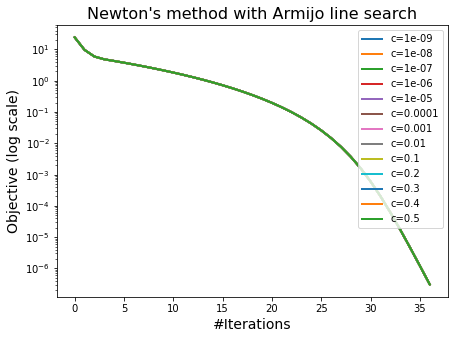

In [ ]:
# Testing c between 0 and 1/2
c_vals = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5]
n_c_vals = len(c_vals)
Wsol = np.zeros((len(w01), n_c_vals))

# Plot for different values of c
plt.figure(figsize=(7, 5))
for i in range(len(c_vals)):
    c = c_vals[i]
    print(f"c={c}")
    results = global_newton(f, grad_f, hess_f, w01, theta=0.5, c=c, verbose=False)
    if results["has_converged"]:
        plt.semilogy(results["obj_vals"], label="c="+str(c), lw=2)

plt.title("Newton's method with Armijo line search", fontsize=16)
plt.xlabel("#Iterations", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend(loc=1)

The convergence plot is the same for every value of $c$. So it seems that the method does not depend on $c$.

Secondly, we try different values of $\theta \in (0, 1)$, with $c$ fixed to $1e-4$.

theta=0.1
Globalized Newton's method has converged in 81 iteration(s).
theta=0.2
Globalized Newton's method has converged in 46 iteration(s).
theta=0.30000000000000004
Globalized Newton's method has converged in 33 iteration(s).
theta=0.4
Globalized Newton's method has converged in 26 iteration(s).
theta=0.5
Globalized Newton's method has converged in 22 iteration(s).
theta=0.6
Globalized Newton's method has converged in 19 iteration(s).
theta=0.7000000000000001
Globalized Newton's method has converged in 16 iteration(s).
theta=0.8
Globalized Newton's method has converged in 11 iteration(s).
theta=0.9
Globalized Newton's method hasn't converged in 1000 iteration(s).


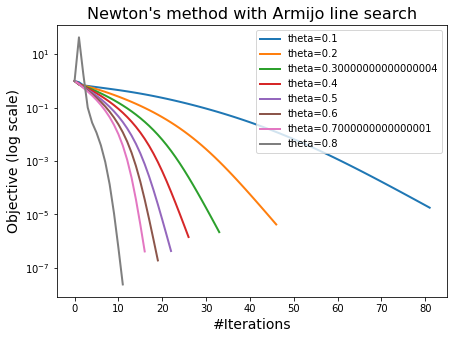

In [ ]:
# Testing theta between 0 and 1
theta_vals = np.arange(0.1, 1, 0.1)
n_theta_vals = len(theta_vals)
Wsol = np.zeros((len(w01), n_theta_vals))

# Plot for different values of c
plt.figure(figsize=(7, 5))
for i in range(len(theta_vals)):
    theta = theta_vals[i]
    print(f"theta={theta}")
    results = global_newton(f, grad_f, hess_f, w02, theta=theta, c=1e-4, verbose=False, max_iter=1000)
    if results["has_converged"]:
        plt.semilogy(results["obj_vals"], label="theta="+str(theta), lw=2)

plt.title("Newton's method with Armijo line search", fontsize=16)
plt.xlabel("#Iterations", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend(loc=1)

We denote that the larger the value of theta, faster the convergence is. For instance, it took 11 iterations for the method to converge with $\theta = 0.8$, but 81 iterations for $\theta = 0.1$. Taking bigger step size leads to a faster convergence. However sometimes, a large step size (e.g. 0.9) prevents to find a local minimum in a fixed number of iterations (`max_step = 1000`) and tolerance (`epsilon = 1e-3`).

Globalized Newton's method hasn't converged in 100 iteration(s).


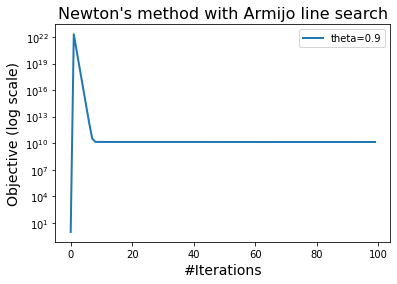

In [ ]:
results = global_newton(f, grad_f, hess_f, w02, theta=theta, c=1e-4, verbose=False, max_iter=100)
plt.semilogy(results["obj_vals"], label="theta=0.9", lw=2)
plt.title("Newton's method with Armijo line search", fontsize=16)
plt.xlabel("#Iterations", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend(loc=1)

The objective value exploded from the beginning.

## 1.3 Quasi-Newton methods and BFGS

$$\mathbf{w}_{k+1} = \mathbf{w}_k - \alpha_k \mathbf{H}_k \nabla f(\mathbf{w}_k)$$


- $\mathbf{H}_k$ symmetric, positive-definite matrix such that $\mathbf{H}_k^{-1} \approx \nabla^2 f(\mathbf{w}_k)$
- $\alpha_k$ computed through line search

### __Implementation 1.3__ 
*Implement a quasi-Newton method with the BFGS update (9) and Armijo line search (7).*

In the main function, we only need to evaluate the gradient for $\mathbf{w}_0$ (during the initialisation part). To avoid computing the gradient for the same $\mathbf{w}_k$ twice (once in the main loop and once during $\mathbf{H}_k$ update), instead we do it once in `BFGS_update` and return the value so that it can be reused in the main loop. 

In [ ]:
def BFGS_update(wk, wk1, gwk, grad_f, Hk, results):
    d = len(wk)
    gwk1 = grad_f(wk1)
    results["num_grad_eval"] += 1

    sk = (wk1 - wk).reshape((d, 1))
    vk = (gwk1 - gwk).reshape((d, 1))
    condition_value = sk.T @ vk
    if condition_value > 0:
        matrix_intermediate = np.identity(d) - (vk @ sk.T) / condition_value
        Hk = (matrix_intermediate.T @ Hk @ matrix_intermediate) + (sk @ sk.T) / condition_value
    return Hk, gwk1

def quasi_newton_BFGS(f, grad_f, w0, theta, c, epsilon=1e-3, max_iter=100, verbose=False, verbose_armijo=False):
    
    # Initialisation
    wk, wk1 = w0, w0 # w_k, w_{k+1}
    gwk = grad_f(wk)
    Id = np.identity(len(w0))
    Hk = Id

    # Dict to store results
    results = {}
    results["w_sols"] = [w0] # Solution history
    results["obj_vals"] = [] # Objective value history
    results["num_func_eval"] = 0
    results["num_grad_eval"] = 1
    results["num_hess_eval"] = 0

    for k in range(max_iter):

        # Compute the objective value and add it to history
        fwk = f(wk)
        results["num_func_eval"] += 1
        results["obj_vals"].append(fwk)

        # Plot relevant information if verbose=True
        if verbose:
            print(f"[{k}]: w={wk}, f(w)={fwk:.4e}")

        # Compute the direction
        dk = -Hk @ gwk

        # Compute the step size with armijo line-search
        alpha_k = armijo(f, wk, fwk, gwk, dk, theta, c, verbose=verbose_armijo)
        
        # Update wk
        wk1 = wk + alpha_k*dk

        # Stopping condition
        if norm(wk1-wk) < epsilon:
            print(f"Newton's method has converged in {k} iteration(s).")
            results["has_converged"] = True
            results["num_iterations"] = k
            return results

        # Update Hk
        Hk, gwk1 = BFGS_update(wk, wk1, gwk, grad_f, Hk, results)

        # Overwrite wk and gwk
        wk = wk1
        gwk = gwk1

        # Add wk to history
        results["w_sols"].append(wk)

    print(f"Quasi-Newton's method hasn't converged in {max_iter} iteration(s).")
    results["has_converged"] = False
    results["num_iterations"] = max_iter
    return results

### __Question 1.5__ 
*Compare the quasi-Newton method from Implementation 1.3 and the line-search
Newton method from Implementation 1.1 on problems (3) and (4). Use the same starting points and the same values for $c$ and $\theta$ in the comparison. Illustrate the comparison in terms of*
- *Iterations*
- *Gradient and Hessian evaluations, assuming the cost of a Hessian matrix is d times that of a gradient vector*
- *Function evaluations*

To compute the gradient evaluation cost, we don't count its evaluation in Armijo, only in the main loop.

#### With q

In [ ]:
w0 = np.array([0,0,0])
d = len(w0)

In [ ]:
# Newton with line search
results_glob_newton = global_newton(q, grad_q, hess_q, w0, theta=0.5, c=1e-4, verbose=True, verbose_armijo=False)

[0]: w=[0 0 0], f(w)=1.8000e+01
[1]: w=[0.5 0.5 0.5], f(w)=4.5000e+00
[2]: w=[0.75 0.75 0.75], f(w)=1.1250e+00
[3]: w=[0.875 0.875 0.875], f(w)=2.8125e-01
[4]: w=[0.9375 0.9375 0.9375], f(w)=7.0313e-02
[5]: w=[0.96875 0.96875 0.96875], f(w)=1.7578e-02
[6]: w=[0.984375 0.984375 0.984375], f(w)=4.3945e-03
[7]: w=[0.9921875 0.9921875 0.9921875], f(w)=1.0986e-03
[8]: w=[0.99609375 0.99609375 0.99609375], f(w)=2.7466e-04
[9]: w=[0.99804687 0.99804687 0.99804687], f(w)=6.8665e-05
[10]: w=[0.99902344 0.99902344 0.99902344], f(w)=1.7166e-05
Globalized Newton's method has converged in 10 iteration(s).


In [ ]:
# quasi-Newton
results_quasi_newton = quasi_newton_BFGS(q, grad_q, w0, theta=0.5, c=1e-4, verbose=True, verbose_armijo=False)

[0]: w=[0 0 0], f(w)=1.8000e+01
[1]: w=[1.5 1.5 1.5], f(w)=4.5000e+00
[2]: w=[1.25 1.25 1.25], f(w)=1.1250e+00
[3]: w=[1.125 1.125 1.125], f(w)=2.8125e-01
[4]: w=[1.0625 1.0625 1.0625], f(w)=7.0312e-02
[5]: w=[1.03125 1.03125 1.03125], f(w)=1.7578e-02
[6]: w=[1.015625 1.015625 1.015625], f(w)=4.3945e-03
[7]: w=[1.0078125 1.0078125 1.0078125], f(w)=1.0986e-03
[8]: w=[1.00390625 1.00390625 1.00390625], f(w)=2.7466e-04
[9]: w=[1.00195312 1.00195313 1.00195312], f(w)=6.8665e-05
[10]: w=[1.00097656 1.00097656 1.00097656], f(w)=1.7166e-05
Newton's method has converged in 10 iteration(s).


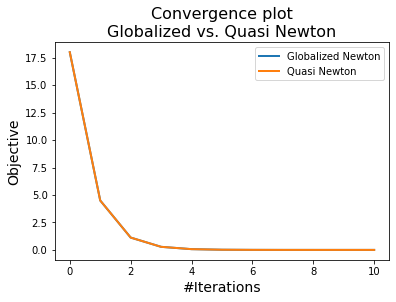

In [ ]:
plt.plot(results_glob_newton["obj_vals"], label="Globalized Newton", lw=2)
plt.plot(results_quasi_newton["obj_vals"], label="Quasi Newton", lw=2)
plt.title("Convergence plot\nGlobalized vs. Quasi Newton", fontsize=16)
plt.xlabel("#Iterations", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend(loc=1)

In [ ]:
center = 10
print("Evaluation cost comparison\n")

print(' | '.join([name.center(center) for name in [" ", "it", "grad", "hess", "func"]]))
print(' | '.join(["globalized".rjust(center),
                  ("%d" % results_glob_newton["num_iterations"]).rjust(center),
                  ("%d" % results_glob_newton["num_grad_eval"]).rjust(center),
                  ("%d" % (results_glob_newton["num_hess_eval"]*d)).rjust(center),
                  ("%d" % results_glob_newton["num_func_eval"]).rjust(center)]))
print(' | '.join(["quasi".rjust(center),
                  ("%d" % results_quasi_newton["num_iterations"]).rjust(center),
                  ("%d" % results_quasi_newton["num_grad_eval"]).rjust(center),
                  ("%d" % (results_quasi_newton["num_hess_eval"]*d)).rjust(center),
                  ("%d" % results_quasi_newton["num_func_eval"]).rjust(center)]))

Evaluation cost comparison

           |     it     |    grad    |    hess    |    func   
globalized |         10 |         11 |         33 |         11
     quasi |         10 |         11 |          0 |         11


Considering the strongly convex quadratic function, the globalized and quasi-Newton methods converge at the same time (they took the same number of iterations to converge), where the latter never accesses the Hessian matrix.

Hence, the quasi-Newton method is less costly for the same convergence results.

#### With Rosenbrock function

In [ ]:
w_vals = [w01, w02]
all_results_glob_newton = []
all_results_quasi_newton = []

print("Newton with line search")
for w in w_vals:
    results_glob_newton = global_newton(f, grad_f, hess_f, w, theta=0.5, c=1e-4, max_iter=1000, verbose=False, verbose_armijo=False)
    all_results_glob_newton.append(results_glob_newton)

print("\nQuasi-newton BFGS")
for w in w_vals:
    results_quasi_newton = quasi_newton_BFGS(f, grad_f, w, theta=0.5, c=1e-4, max_iter=1000, verbose=False, verbose_armijo=False)
    all_results_quasi_newton.append(results_quasi_newton)

Newton with line search
Globalized Newton's method has converged in 36 iteration(s).
Globalized Newton's method has converged in 22 iteration(s).

Quasi-newton BFGS
Newton's method has converged in 38 iteration(s).
Newton's method has converged in 27 iteration(s).


In [ ]:
for i in range(len(w_vals)):
    print(f"Evaluation cost comparison, w0={w_vals[i]}\n")

    print(' | '.join([name.center(center) for name in [" ", "it", "grad", "hess", "func"]]))
    print(' | '.join(["globalized".rjust(center),
                    ("%d" % all_results_glob_newton[i]["num_iterations"]).rjust(center),
                    ("%d" % all_results_glob_newton[i]["num_grad_eval"]).rjust(center),
                    ("%d" % (all_results_glob_newton[i]["num_hess_eval"]*d)).rjust(center),
                    ("%d" % all_results_glob_newton[i]["num_func_eval"]).rjust(center)]))
    print(' | '.join(["quasi".rjust(center),
                    ("%d" % all_results_quasi_newton[i]["num_iterations"]).rjust(center),
                    ("%d" % all_results_quasi_newton[i]["num_grad_eval"]).rjust(center),
                    ("%d" % (all_results_quasi_newton[i]["num_hess_eval"]*d)).rjust(center),
                    ("%d" % all_results_quasi_newton[i]["num_func_eval"]).rjust(center)]))
    print("\n\n")

Evaluation cost comparison, w0=[-1.2  1. ]

           |     it     |    grad    |    hess    |    func   
globalized |         36 |         37 |        111 |         37
     quasi |         38 |         39 |          0 |         39



Evaluation cost comparison, w0=[0.    0.005]

           |     it     |    grad    |    hess    |    func   
globalized |         22 |         23 |         69 |         23
     quasi |         27 |         28 |          0 |         28


Considering the Rosenbrock function, the difference in terms of convergence, gradient, hessian and function evaluations is stronger.

- With $\mathbf{w}_{01}$ starting point, both methods converge almost at the same time, but the Hessian evaluation is costly for the globalized Newton method. 
- With $\mathbf{w}_{02}$ starting point, the quasi-Newton approach took much longer time to converge than the globalized method. 

We need to find a trade-off between the number of iterations to converge (and thus the cost associated to the gradient vector evaluation) and the cost of the Hessian matrix evaluation, to choose the most computationally interesting approach.



## 1.4 Limited-memory BFGS

### __Implementation 1.4__
*Implement a quasi-Newton method with the L-BFGS update described by Algorithm 1 and Armijo line search (7).*

In [ ]:
def LBFGS_update(m, list_sk, list_vk, d):
    Id = np.identity(d)
    Hk = Id
    start = max(0, m-1)
    for i in range(start, 0, -1):
        sk_minus_i = list_sk[-i]
        vk_minus_i = list_vk[-i]
        condition_value = sk_minus_i.T @ vk_minus_i
        if condition_value > 0:
            matrix_intermediate = Id - (vk_minus_i @ sk_minus_i.T) / condition_value
            Hk = (matrix_intermediate.T @ Hk @ matrix_intermediate) + (sk_minus_i @ sk_minus_i.T) / condition_value
    return Hk
                                                                                                                          
def LBFGS_newton(f, grad_f, w0, theta, c, m, epsilon=1e-3, max_iter=100, verbose=False, verbose_armijo=False):
    
    # Initialisation
    wk, wk1 = w0, w0 # w_k, w_{k+1}
    gwk = grad_f(wk)
    Id = np.identity(len(w0))
    Hk = Id
    list_sk, list_vk = [], []

    # Dict to store results
    results = {}
    results["w_sols"] = [w0] # Solution history
    results["obj_vals"] = [] # Objective value history
    results["num_func_eval"] = 0
    results["num_grad_eval"] = 1
    results["num_hess_eval"] = 0

    for k in range(max_iter):

        # Compute the objective value and add it to history
        fwk = f(wk)
        results["num_func_eval"] += 1
        results["obj_vals"].append(fwk)

        # Plot relevant information if verbose=True
        if verbose:
            print(f"[{k}]: w={wk}, f(w)={fwk:.4e}")

        # Compute direction
        dk = -Hk @ gwk

        # Compute step size
        alpha_k = armijo(f, wk, fwk, gwk, dk, theta, c, verbose=verbose_armijo)
        
        # Update iteration
        wk1 = wk + alpha_k*dk

        # Stopping condition
        if norm(wk1-wk) < epsilon:
            print(f"Newton's method has converged in {k} iteration(s).")
            results["has_converged"] = True
            results["num_iterations"] = k
            return results

        # Update Hk (L-BFGS update)
        gwk1 = grad_f(wk1)
        results["num_grad_eval"] += 1
        sk = wk1 - wk
        vk = gwk1 - gwk
        list_sk.append(sk)
        list_vk.append(vk)
        if k < m:
            Hk = LBFGS_update(k, list_sk, list_vk, d=len(wk))
        else:
            Hk = LBFGS_update(m, list_sk, list_vk, d=len(wk))

        # Overwrite wk and gwk
        wk = wk1
        gwk = gwk1

        # Add wk to history
        results["w_sols"].append(wk)

    print(f"L-BFGS Newton's method hasn't converged in {max_iter} iteration(s).")
    results["has_converged"] = False
    results["num_iterations"] = max_iter
    return results

### __Question 1.6__ 
*Run BFGS and three variants of L-BFGS respectively using $m = 0$, $m = 1$ and $m = 5$ on the Rosenbrock function (4), and compare the results. What metric could show the computational interest of limited memory quasi-Newton? Do you observe this improvement here?*

In [ ]:
w_vals = [w01, w02, w03]
m_vals = [0, 1, 5]
all_results_bfgs = []
all_results_lbfgs = []

print("Quasi-newton BFGS")
for w in w_vals:
    results_bfgs = quasi_newton_BFGS(f, grad_f, w, theta=0.5, c=1e-4, max_iter=1000, verbose=False, verbose_armijo=False)
    all_results_bfgs.append(results_bfgs)

print("\nL-BFGS")
for w in w_vals:
    results_diff_m = []
    for m in m_vals:
        print(f"m={m}: ", end="")
        results_lbfgs = LBFGS_newton(f, grad_f, w, theta=0.5, c=1e-4, m=m, epsilon=1e-3, max_iter=2000, verbose=False, verbose_armijo=False)
        results_diff_m.append(results_lbfgs)
    all_results_lbfgs.append(results_diff_m)

Quasi-newton BFGS
Newton's method has converged in 38 iteration(s).
Newton's method has converged in 27 iteration(s).
Newton's method has converged in 27 iteration(s).

L-BFGS
m=0: Newton's method has converged in 48 iteration(s).
m=1: Newton's method has converged in 48 iteration(s).
m=5: Newton's method has converged in 48 iteration(s).
m=0: Newton's method has converged in 120 iteration(s).
m=1: Newton's method has converged in 120 iteration(s).
m=5: Newton's method has converged in 267 iteration(s).
m=0: Newton's method has converged in 120 iteration(s).
m=1: Newton's method has converged in 120 iteration(s).
m=5: Newton's method has converged in 267 iteration(s).


In [ ]:
for i in range(len(w_vals)):
    print(f"Evaluation cost comparison, w0{i+1}={w_vals[i]}\n")

    print(' | '.join([name.center(center) for name in [" ", "it", "grad", "hess", "func"]]))
    print(' | '.join(["BFGS".rjust(center),
                    ("%d" % all_results_bfgs[i]["num_iterations"]).rjust(center),
                    ("%d" % all_results_bfgs[i]["num_grad_eval"]).rjust(center),
                    ("%d" % (all_results_bfgs[i]["num_hess_eval"]*d)).rjust(center),
                    ("%d" % all_results_bfgs[i]["num_func_eval"]).rjust(center)]))
    for j in range(len(m_vals)):
        print(' | '.join([f"L-BFGS, m={m_vals[j]}".rjust(center),
                        ("%d" % all_results_lbfgs[i][j]["num_iterations"]).rjust(center),
                        ("%d" % all_results_lbfgs[i][j]["num_grad_eval"]).rjust(center),
                        ("%d" % (all_results_lbfgs[i][j]["num_hess_eval"]*d)).rjust(center),
                        ("%d" % all_results_lbfgs[i][j]["num_func_eval"]).rjust(center)]))
    print("\n\n")

Evaluation cost comparison, w01=[-1.2  1. ]

           |     it     |    grad    |    hess    |    func   
      BFGS |         38 |         39 |          0 |         39
L-BFGS, m=0 |         48 |         49 |          0 |         49
L-BFGS, m=1 |         48 |         49 |          0 |         49
L-BFGS, m=5 |         48 |         49 |          0 |         49



Evaluation cost comparison, w02=[0.    0.005]

           |     it     |    grad    |    hess    |    func   
      BFGS |         27 |         28 |          0 |         28
L-BFGS, m=0 |        120 |        121 |          0 |        121
L-BFGS, m=1 |        120 |        121 |          0 |        121
L-BFGS, m=5 |        267 |        268 |          0 |        268



Evaluation cost comparison, w03=[0.    0.005]

           |     it     |    grad    |    hess    |    func   
      BFGS |         27 |         28 |          0 |         28
L-BFGS, m=0 |        120 |        121 |          0 |        121
L-BFGS, m=1 |        120 |   

Overall, we denote that L-BFGS takes a lot more iterations to converge than BFGS. It is not surprising as the approximation of the hessian matrix is more precise for BFGS than for L-BFGS where only the latest $m$ pairs $\{(s_{k-i}, v_{k-i})\}_{i=0}^{max(0,m-1)}$ are used to update the approximation. However, I am quite surprised that for the last two starting points ($\mathbf{w}_{02}$ and $\mathbf{w}_{03}$), L-BFGS with $m=5$ took a lot more time to converge than with $m=0$ or $m=1$. Using the same argument as previously, I would have expected better performance since we have better approximation of the Hessian with $m$ set to 5.

# Exercise 2. Stochastic second-order methods

In [ ]:
from scipy.linalg import norm # Euclidean norm
from tqdm import tqdm
import random

## 2.1 Subsampling Newton methods

### __Implementation 2.1__ 

*Implement a subsampling Newton method with the following requirements:*
- *The method should take $|\mathcal{S}_k|$ and $|\mathcal{S}_k^H|$ as inputs (for simplicity, we only consider constant sample sizes).*
- *The method should be able to use two different stepsize approaches:*
    - *Constant stepsize $\alpha_k = \alpha > 0$ (provided by the user);*
    - *Stepsize computed via the subsampling line-search technique described in Definition 2.1.*

In [ ]:
class LogRegPb(object):

    def __init__(self, X, y, lbda=0):
        self.X = X
        self.y = y
        self.n, self.d = X.shape
        self.lbda = lbda
        
    # Objective value
    def f(self, w):
        yXw = self.y * self.X.dot(w)
        return np.mean(np.log(1. + np.exp(-yXw))) + self.lbda * norm(w) ** 2 / 2.

    # Partial objective value
    def fi(self, w, i):
        yXwi = self.y[i] * np.dot(self.X[i], w)
        return np.log(1. + np.exp(-yXwi)) + self.lbda * norm(w) ** 2 / 2.

    # Full gradient computation
    def grad(self, w):
        yXw = self.y * self.X.dot(w)
        aux = 1. / (1. + np.exp(yXw))
        return - (self.X.T).dot(self.y * aux) / self.n + self.lbda * w

    # Partial gradient
    def grad_fi(self, w, i):
        grad = - self.X[i] * self.y[i] / (1. + np.exp(self.y[i]* self.X[i].dot(w)))
        grad += self.lbda * w
        return grad
    
    # Partial hessian
    def hess_fi(self, w, i):
        x_i = self.X[i].reshape(self.d, 1)
        ywX = self.y[i] * np.dot(w.T, x_i)
        xx = np.dot(x_i, x_i.T)
        hess = (np.exp(ywX) / (1. + np.exp(ywX))**2) * xx
        hess += self.lbda * np.identity(self.d)
        return hess

    def sigmoid(self, x):
        return 1.0/(1 + np.exp(-x)) 

    # Full hessian computation
    def hess(self, w):
        D = np.zeros((self.n, self.n))
        for i in range(self.n):
            zi = np.dot(w, self.X[i])
            D[i][i] = self.sigmoid(zi) * (1 - self.sigmoid(zi))
        hess = np.dot(self.X.T, np.dot(D, self.X)) + self.lbda * np.identity(self.d)
        return hess

    # Lipschitz constant for the gradient
    def lipgrad(self):
        L = 4 * norm(np.dot(self.X, self.X.T)) / self.n + self.lbda
        return L

    # Lipschitz constant for the subsampling gradient 
    def lipgradbatch(self, batch):
        L = 4 * norm(np.sum([np.dot(self.X[i], self.X[i].T) for i in batch])) / len(batch) + self.lbda
        return L 

    def get_batch(self, size):
        return np.random.choice(range(self.n), size=size, replace=False)

    def func_batch(self, func, batch, w):
        return np.mean([func(w, i) for i in batch], axis=0)

In [ ]:
def subsampling_armijo(logregpb, wk, dk, Sk, theta, c, max_iter=10, verbose=False):
    alpha = theta
    gwk = logregpb.func_batch(logregpb.grad_fi, Sk, wk)
    f_Sk_wk = logregpb.func_batch(logregpb.fi, Sk, wk)
    for i in range(max_iter):
        new_w = wk + alpha * dk
        f_Sk_new_w = logregpb.func_batch(logregpb.fi, Sk, new_w)
        if f_Sk_new_w < f_Sk_wk + c*alpha*(dk.T @ gwk):
            if verbose:
                print(f'    subsampling armijo: {i}, alpha={alpha}')
            return alpha
        alpha = alpha * theta
    if verbose:
        print(f'    subsampling armijo has not converged. alpha={alpha}')
    return alpha

def subsampling_newton(logregpb, w0, theta, c, Sk_size, SkH_size, alpha=None, type_alpha='lipgrad', epochs=100, verbose=False, max_iter_armijo=10, verbose_armijo=False):
    
    # Initialisation
    wk = w0
    num_iter_per_epoch = logregpb.n // (Sk_size + SkH_size)
    max_iter = epochs * num_iter_per_epoch

    # Dict to store results
    results = {}
    results["w_sols"] = [w0] # Solution history
    results["obj_vals"] = [] # Objective value history

    for k in tqdm(range(max_iter)):

        # Compute objective value at wk
        fwk = logregpb.f(wk)
        if k % num_iter_per_epoch == 0:
            results["obj_vals"].append(fwk)

        # Print relevant information if verbose=True
        if verbose:
            print(f"[{k}]: w={wk}, f(w)={fwk:.4e}")

        # Create batches
        Sk = logregpb.get_batch(Sk_size)
        SkH = logregpb.get_batch(SkH_size)

        # Compute subsampling gradient and hessian
        gwk = logregpb.func_batch(logregpb.grad_fi, Sk, wk)
        hwk = logregpb.func_batch(logregpb.hess_fi, SkH, wk)

        # Compute direction
        try:
            dk = -np.linalg.inv(hwk).dot(gwk)
        except Exception as e:
            print(f"Subsampling Hessian matrix at w={wk} is not invertible.")
            results["num_iterations"] = k
            results["final_obj_val"] = fwk
            results["wn"] = wk
            return results

        # Compute step size
        if alpha:  
            # Constant step size divided by the Lipchitz constant of the gradient (provided as argument)
            if type_alpha == 'lipgrad': 
                alpha_k = alpha
            # Step size divided by the Lipchitz constant of the subsampling hessian
            if type_alpha == 'lipgradbatch':
                alpha_k = alpha / logregpb.lipgradbatch(Sk)
        else:
            alpha_k = subsampling_armijo(logregpb, wk, dk, Sk, theta, c, max_iter=max_iter_armijo, verbose=verbose_armijo)
        
        # Update subsampling iteration
        wk = wk + alpha_k*dk
        if k % num_iter_per_epoch == 0:
            results["w_sols"].append(wk)

    print(f"\nFinish {epochs} epochs = {epochs * num_iter_per_epoch} iterations ({num_iter_per_epoch} iterations/epoch).")
    results["num_iterations"] = k
    results["final_obj_val"] = fwk
    results["wn"] = wk
    return results

### __Question 2.1__ 

*Using the same (synthetic) dataset than in lab 3 of the course (on stochastic gradient methods), compare the subsampling Newton method with the standard Newton method with the following settings:*
- *Use the appropriate version of Armijo line search for each method (use the same $c$ and $\theta$);
- *Use different sizes for $|\mathcal{S}_k|$ and $|\mathcal{S}_k^H|$, including the configuration $|\mathcal{S}_k| = |\mathcal{S}_k^H| = 1$.*
*Use the notion of epoch for the comparison.*


If $n$ is the number of training samples, we will consider an epoch as an access to $n$ training samples (replacement is thus possible).

- Cost of one iteration = $|\mathcal{S}_k| + |\mathcal{S}_k^H|$ accesses
- Cost of one epoch = $\frac{n}{|\mathcal{S}_k| + |\mathcal{S}_k^H|}$

#### Data generation

First, we generate the same synthetic data than in lab 3 of the course.

In [ ]:
from numpy.random import multivariate_normal, randn # Probability distributions on vectors
from scipy.linalg.special_matrices import toeplitz # A special kind of matrices

def simu_linmodel(w, n, std=1., corr=0.5):  
    d = w.shape[0]
    cov = toeplitz(corr ** np.arange(0, d))
    X = multivariate_normal(np.zeros(d), cov, size=n)
    noise = std * randn(n)
    y = X.dot(w) + noise
    return X, y

In [ ]:
d = 50
n = 1000
idx = np.arange(d)
lbda = 1. / n ** (0.5)

# Fix random seed for reproducibility
np.random.seed(0)

# Ground truth coefficients of the model
w_model_truth = (-1)**idx * np.exp(-idx / 10.)

Xlog, ylog = simu_linmodel(w_model_truth, n, std=1., corr=0.7)
ylog = np.sign(ylog) # Taking the logarithm for binary classification

logregpb = LogRegPb(Xlog, ylog, lbda=lbda)

We compute the optimal solution, which will be used for convergence plots.

In [ ]:
from scipy.optimize import fmin_l_bfgs_b # Efficient optimizer

# Starting point
w_init = np.zeros(d)

# Compute the optimal solution for logistic regression
w_min_log, f_min_log, _ = fmin_l_bfgs_b(logregpb.f, w_init, logregpb.grad, args=(), pgtol=1e-30, factr =1e-30)

print(f_min_log)

0.5571363594573262


#### Subsampling Newton


##### __Some tests to choose $\theta$__

100%|██████████| 500/500 [00:09<00:00, 54.35it/s]


Finish 100 epochs = 500 iterations (5 iterations/epoch).


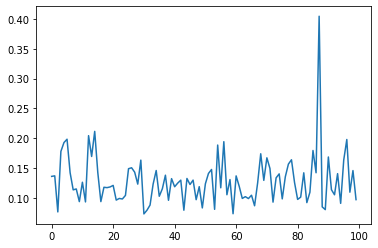

In [ ]:
# Subsampling armijo 0.5
results_sub = subsampling_newton(logregpb, w_init, theta=0.5, c=1e-4, Sk_size=100, SkH_size=100, alpha=None, epochs=100)
plt.plot(results_sub["obj_vals"]-f_min_log)

100%|██████████| 500/500 [00:09<00:00, 52.99it/s]



Finish 100 epochs = 500 iterations (5 iterations/epoch).


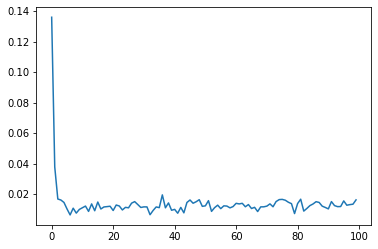

In [ ]:
# Subsampling armijo 0.1
results_sub = subsampling_newton(logregpb, w_init, theta=0.1, c=1e-4, Sk_size=100, SkH_size=100, alpha=None, epochs=100)
plt.plot(results_sub["obj_vals"]-f_min_log)

100%|██████████| 500/500 [00:09<00:00, 53.15it/s]


Finish 100 epochs = 500 iterations (5 iterations/epoch).


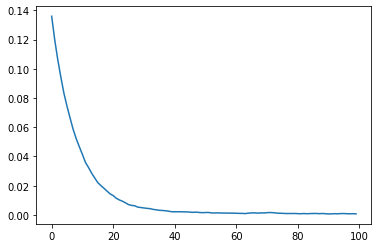

In [ ]:
# Subsampling armijo 0.01
results_sub = subsampling_newton(logregpb, w_init, theta=0.01, c=1e-4, Sk_size=100, SkH_size=100, alpha=None, epochs=100)
plt.plot(results_sub["obj_vals"]-f_min_log)

The convergence plot is smoother for $\theta = 0.01$, so in the following we will fix $\theta$ to $0.01$. 
And $c$ to $1e-4$. 

##### __Varying batch sizes__

1. $|\mathcal{S}_k| = |\mathcal{S}_k^H|$

100%|██████████| 100000/100000 [03:05<00:00, 537.94it/s]



Finish 200 epochs = 100000 iterations (500 iterations/epoch).


100%|██████████| 10000/10000 [00:45<00:00, 219.82it/s]



Finish 200 epochs = 10000 iterations (50 iterations/epoch).


100%|██████████| 4000/4000 [00:37<00:00, 107.80it/s]



Finish 200 epochs = 4000 iterations (20 iterations/epoch).


100%|██████████| 2000/2000 [00:27<00:00, 73.25it/s]



Finish 200 epochs = 2000 iterations (10 iterations/epoch).


100%|██████████| 1000/1000 [00:23<00:00, 42.74it/s]



Finish 200 epochs = 1000 iterations (5 iterations/epoch).


100%|██████████| 200/200 [00:12<00:00, 15.79it/s]



Finish 200 epochs = 200 iterations (1 iterations/epoch).


100%|██████████| 200/200 [00:29<00:00,  6.70it/s]


Finish 200 epochs = 200 iterations (1 iterations/epoch).


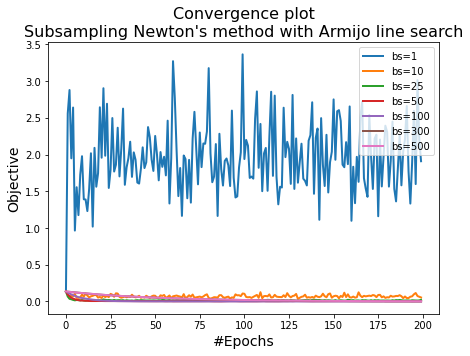

In [ ]:
batch_sizes = [1, 10, 25, 50, 100, 300, 500]
all_results_sub_same_bs = []

plt.figure(figsize=(7, 5))
for batch_size in batch_sizes:
    results = subsampling_newton(logregpb, w_init, theta=0.01, c=1e-4, Sk_size=batch_size, SkH_size=batch_size, alpha=False, epochs=200, verbose=False, verbose_armijo=False)
    all_results_sub_same_bs.append(results)
    plt.plot(results["obj_vals"]-f_min_log, label="bs="+str(batch_size), lw=2)

plt.title("Convergence plot\nSubsampling Newton's method with Armijo line search", fontsize=16)
plt.xlabel("#Epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend(loc=1)

We first observe that with a batch size of 1 for both $\mathcal{S}_k$ and $\mathcal{S}_k^H$, the method does not converge. A single data point is used to approximate the gradient and the hessian. This setting resembles stochastic gradient in the case of first-order method, which is not a descent method in general.

We discard the blue plot to focus on other batch sizes.

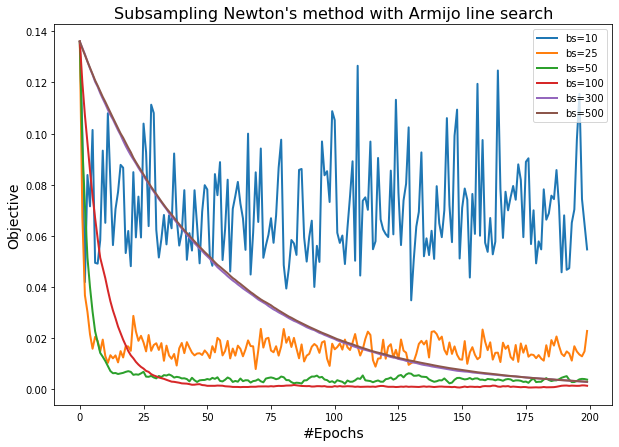

In [ ]:
plt.figure(figsize=(10, 7))
for i in range(1, len(all_results_sub_same_bs)):
    plt.plot(all_results_sub_same_bs[i]["obj_vals"]-f_min_log, label="bs="+str(batch_sizes[i]), lw=2)

plt.title("Subsampling Newton's method with Armijo line search", fontsize=16)
plt.xlabel("#Epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend(loc=1)

We first observe that a small batch size leads to too much variance, whereas with a bigger batch size, it is reduced. For example, the objective curve with the batch size equal to 300 or 500, is smoother, but the convergence is slow.
Based on the results, a batch size of 50 and 100 lead to good convergence, and the former leads to a faster convergence.

Let's now choose different batch sizes for both $\mathcal{S}_k$ and $\mathcal{S}_k^H$.

2. $|\mathcal{S}_k| \neq |\mathcal{S}_k^H|$

100%|██████████| 2600/2600 [00:26<00:00, 99.78it/s] 



Finish 200 epochs = 2600 iterations (13 iterations/epoch).


100%|██████████| 1200/1200 [00:18<00:00, 63.50it/s]



Finish 200 epochs = 1200 iterations (6 iterations/epoch).


100%|██████████| 600/600 [00:21<00:00, 27.60it/s]



Finish 200 epochs = 600 iterations (3 iterations/epoch).


100%|██████████| 5400/5400 [00:46<00:00, 116.86it/s]



Finish 200 epochs = 5400 iterations (27 iterations/epoch).


100%|██████████| 2600/2600 [00:30<00:00, 84.13it/s] 



Finish 200 epochs = 2600 iterations (13 iterations/epoch).


100%|██████████| 1200/1200 [00:19<00:00, 61.21it/s]


Finish 200 epochs = 1200 iterations (6 iterations/epoch).


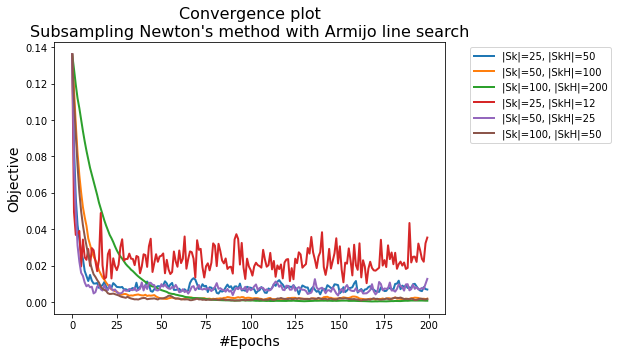

In [ ]:
Sk_sizes = [25, 50, 100]
SkH_sizes_p = [size * 2 for size in Sk_sizes]
SkH_sizes_m = [size // 2 for size in Sk_sizes]

all_results_sub_diff_bs = []

plt.figure(figsize=(7, 5))
for Sk_size, SkH_size in zip(Sk_sizes, SkH_sizes_p):
    results = subsampling_newton(logregpb, w_init, theta=0.01, c=1e-4, Sk_size=Sk_size, SkH_size=SkH_size, alpha=False, epochs=200, verbose=False, verbose_armijo=False)
    all_results_sub_diff_bs.append(results)
    plt.plot(results["obj_vals"]-f_min_log, label=f"|Sk|={Sk_size}, |SkH|={SkH_size}", lw=2)

for Sk_size, SkH_size in zip(Sk_sizes, SkH_sizes_m):
    results = subsampling_newton(logregpb, w_init, theta=0.01, c=1e-4, Sk_size=Sk_size, SkH_size=SkH_size, alpha=False, epochs=200, verbose=False, verbose_armijo=False)
    all_results_sub_diff_bs.append(results)
    plt.plot(results["obj_vals"]-f_min_log, label=f"|Sk|={Sk_size}, |SkH|={SkH_size}", lw=2)

plt.title("Convergence plot\nSubsampling Newton's method with Armijo line search", fontsize=16)
plt.xlabel("#Epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

Let's compare all configurations.

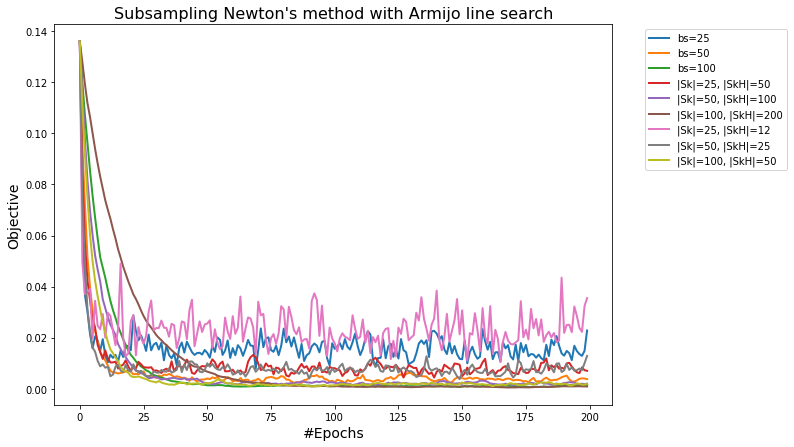

In [ ]:
plt.figure(figsize=(10, 7))

for i in range(2, 5):
    plt.plot(all_results_sub_same_bs[i]["obj_vals"]-f_min_log, label="bs="+str(batch_sizes[i]), lw=2)

for i, (Sk_size, SkH_size) in enumerate(zip(Sk_sizes, SkH_sizes_p)):
    plt.plot(all_results_sub_diff_bs[i]["obj_vals"]-f_min_log, label=f"|Sk|={Sk_size}, |SkH|={SkH_size}", lw=2)

for i, (Sk_size, SkH_size) in enumerate(zip(Sk_sizes, SkH_sizes_m)):
    plt.plot(all_results_sub_diff_bs[i+3]["obj_vals"]-f_min_log, label=f"|Sk|={Sk_size}, |SkH|={SkH_size}", lw=2)

plt.title("Subsampling Newton's method with Armijo line search", fontsize=16)
plt.xlabel("#Epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

From the plot, 
$|\mathcal{S}_k| = |\mathcal{S}_k^H| = 100$ and $|\mathcal{S}_k| = 100, |\mathcal{S}_k^H| = 50$ give best convergence curve. 

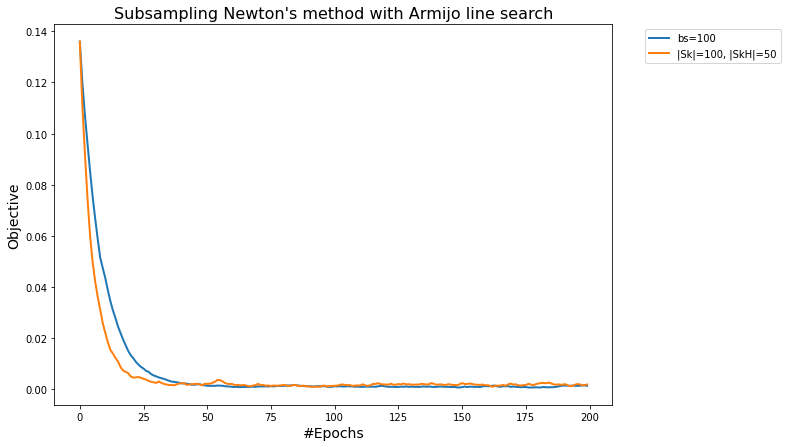

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(all_results_sub_same_bs[4]["obj_vals"]-f_min_log, label="bs="+str(batch_sizes[4]), lw=2)
plt.plot(all_results_sub_diff_bs[-1]["obj_vals"]-f_min_log, label=f"|Sk|={Sk_sizes[-1]}, |SkH|={SkH_sizes_m[-1]}", lw=2)

plt.title("Subsampling Newton's method with Armijo line search", fontsize=16)
plt.xlabel("#Epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

With $|\mathcal{S}_k| = 100$ and $|\mathcal{S}_k^H| = 50$, we obtain a faster convergence and lower cost for the subsampling hessian (since we access to less data points).

#### Standard Newton

An epoch corresponds to one iteration, since we access to all data points to compute the gradient and the hessian.
We rewrite the `global_newton` function to discard the stopping criterion, and also stops the method after `max_iter` iterations, which we consider as epochs.

In [ ]:
def global_newton(f, grad_f, hess_f, w0, theta, c, max_iter=100, verbose=False, verbose_armijo=False):
    
    # Initialisation
    wk = w0

    # Dict to store results
    results = {}
    results["w_sols"] = [w0] # Solution history
    results["obj_vals"] = [] # Objective value history

    for k in tqdm(range(max_iter)):

        # Compute the objective value and add it to history
        fwk = f(wk)
        results["obj_vals"].append(fwk)

        # Plot relevant information if verbose=True
        if verbose:
            print(f"[{k}]: w={wk}, f(w)={fwk:.4e}")

        # Compute gradient and hessian
        gwk = grad_f(wk)
        hwk = hess_f(wk)

        # Compute lambda_k
        lambda_k = 2*max(-min(np.linalg.eigvals(hwk)), 1e-10)
       
        # Compute the direction
        try:
            dk = -np.linalg.inv(hwk + lambda_k*np.eye(len(w0))) @ gwk
        except Exception as e:
            print(f"Hessian matrix + lambda_k*Id at w={wk} is not invertible.")
            results["final_obj_value"] = fwk
            results["wn"] = wk
            return results

        # Compute the step size with armijo line-search
        alpha_k = armijo(f, wk, fwk, gwk, dk, theta, c, verbose=verbose_armijo)

        # Update wk
        wk1 = wk + alpha_k*dk

        # Overwrite wk
        wk = wk1

        # Add wk to history
        results["w_sols"].append(wk)

    results["final_obj_value"] = fwk
    results["wn"] = wk
    return results

100%|██████████| 200/200 [00:09<00:00, 20.13it/s]


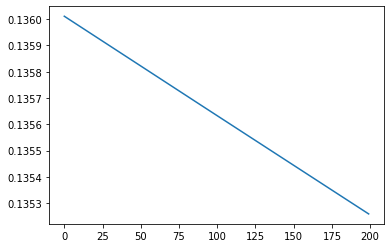

In [ ]:
results_newton = global_newton(logregpb.f, logregpb.grad, logregpb.hess, w_init, theta=0.01, c=1e-4, max_iter=200, verbose=False, verbose_armijo=False)
plt.plot(results_newton['obj_vals']-f_min_log)

The convergence is very slow since we set $\theta$ to $0.01$. With the same paramaters ($\theta$, $c$, and the number of epochs), the subsampling version is better in terms of convergence. 

100%|██████████| 4000/4000 [01:47<00:00, 37.07it/s]


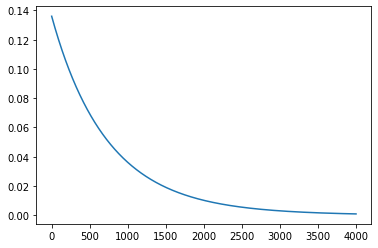

In [ ]:
results_newton = global_newton(logregpb.f, logregpb.grad, logregpb.hess, w_init, theta=0.5, c=1e-4, max_iter=4000, verbose=False, verbose_armijo=False)
plt.plot(results_newton['obj_vals']-f_min_log)

### __Question 2.2__
*Fix sample sizes for the gradient and Hessian. We consider two possible stepsize choices:*

a) *$\alpha_k = \frac{\bar{α}}{L}$ where $L = \frac{4||\mathbf{XX^T}||}{n} + λ$ is the Lipschitz constant of $∇f$;*

b) *$\alpha_k = \frac{\bar{α}}{L_{\mathcal{S_k}}}$ where*
$$L = \frac{4||\sum_{i \in \mathcal{S}_k}\mathbf{x_i x_i^T}||}{|\mathcal{S}_k|} + λ$$
*Compare the two choices for different values of ᾱ and a fixed number of epochs.*

In [ ]:
epochs = 100
Sk_size = 100
SkH_size = 50
alpha_bar_vals = [0.1, 0.5, 1, 2, 5, 10]
n_alpha_vals = len(alpha_bar_vals)

##### a) $\alpha_k = \frac{\bar{α}}{L}$ 

In [ ]:
L = logregpb.lipgrad()
alpha_vals = [alpha_bar / L for alpha_bar in alpha_bar_vals]

In [ ]:
alpha_vals

[0.0020703761229940924,
 0.01035188061497046,
 0.02070376122994092,
 0.04140752245988184,
 0.10351880614970461,
 0.20703761229940923]

100%|██████████| 600/600 [00:04<00:00, 130.90it/s]



Finish 100 epochs = 600 iterations (6 iterations/epoch).


100%|██████████| 600/600 [00:04<00:00, 129.40it/s]



Finish 100 epochs = 600 iterations (6 iterations/epoch).


100%|██████████| 600/600 [00:04<00:00, 126.90it/s]



Finish 100 epochs = 600 iterations (6 iterations/epoch).


100%|██████████| 600/600 [00:04<00:00, 129.35it/s]



Finish 100 epochs = 600 iterations (6 iterations/epoch).


100%|██████████| 600/600 [00:04<00:00, 123.73it/s]



Finish 100 epochs = 600 iterations (6 iterations/epoch).


100%|██████████| 600/600 [00:04<00:00, 125.66it/s]


Finish 100 epochs = 600 iterations (6 iterations/epoch).


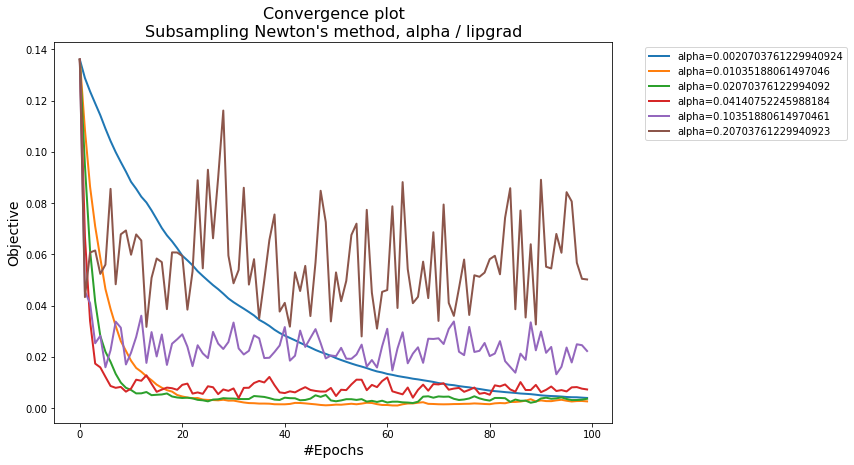

In [ ]:
all_results_sub_lipgrad = []

plt.figure(figsize=(10, 7))
for alpha in alpha_vals:
    results = subsampling_newton(logregpb, w_init, theta=0.01, c=1e-4, Sk_size=Sk_size, SkH_size=SkH_size, alpha=alpha, type_alpha='lipgrad', epochs=epochs)
    all_results_sub_lipgrad.append(results)
    plt.plot(results["obj_vals"]-f_min_log, label="alpha="+str(alpha), lw=2)

plt.title("Convergence plot\nSubsampling Newton's method, alpha / lipgrad", fontsize=16)
plt.xlabel("#Epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

We observe a lot of variance when we set $\bar{\alpha}$ to 5 or 10, which results in $\alpha$ equal to 0.1 and 0.2 respectively. The performance is better for $\bar{\alpha}$ in [0.5, 1, 2].

##### b) $\alpha_k = \frac{\bar{α}}{L_{\mathcal{S_k}}}$ 

100%|██████████| 600/600 [00:04<00:00, 121.40it/s]



Finish 100 epochs = 600 iterations (6 iterations/epoch).


100%|██████████| 600/600 [00:04<00:00, 123.18it/s]



Finish 100 epochs = 600 iterations (6 iterations/epoch).


100%|██████████| 600/600 [00:05<00:00, 119.62it/s]



Finish 100 epochs = 600 iterations (6 iterations/epoch).


100%|██████████| 600/600 [00:04<00:00, 122.06it/s]



Finish 100 epochs = 600 iterations (6 iterations/epoch).


100%|██████████| 600/600 [00:04<00:00, 120.75it/s]



Finish 100 epochs = 600 iterations (6 iterations/epoch).


100%|██████████| 600/600 [00:04<00:00, 122.62it/s]



Finish 100 epochs = 600 iterations (6 iterations/epoch).


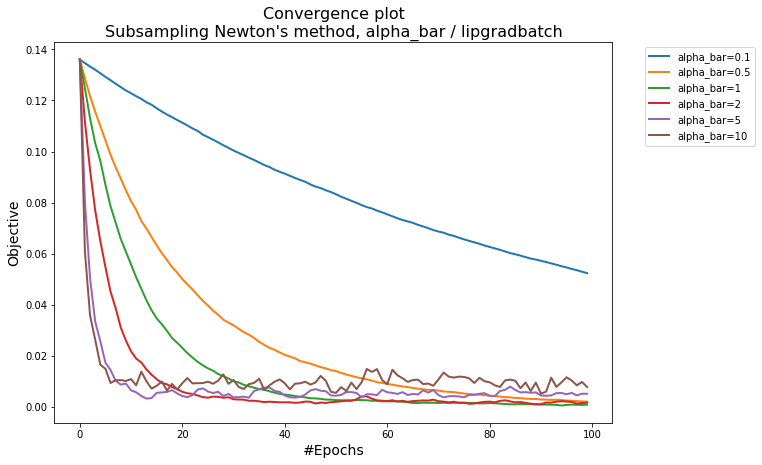

In [ ]:
all_results_sub_lipgrad_batch = []

plt.figure(figsize=(10, 7))
for alpha_bar in alpha_bar_vals:
    results = subsampling_newton(logregpb, w_init, theta=0.01, c=1e-4, Sk_size=Sk_size, SkH_size=SkH_size, alpha=alpha_bar, type_alpha='lipgradbatch', epochs=epochs)
    all_results_sub_lipgrad_batch.append(results)
    plt.plot(results["obj_vals"]-f_min_log, label="alpha_bar="+str(alpha_bar), lw=2)

plt.title("Convergence plot\nSubsampling Newton's method, alpha_bar / lipgradbatch", fontsize=16)
plt.xlabel("#Epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

Compared to the previous $\alpha$ choice, setting $\bar{\alpha}$ to values in [5, 10] lead to a good result.

__Comparison of the two choices__

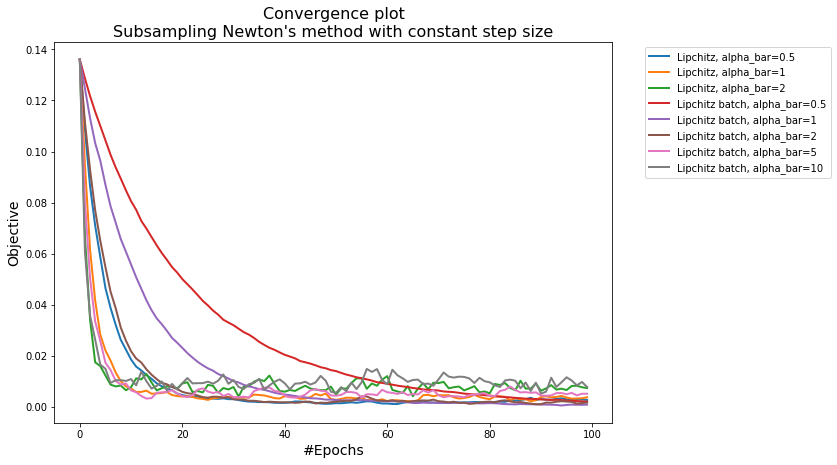

In [ ]:
plt.figure(figsize=(10,7))
for i in range(1, 4):
    plt.plot(all_results_sub_lipgrad[i]["obj_vals"]-f_min_log, label="Lipchitz, alpha_bar="+str(alpha_bar_vals[i]), lw=2)

for i in range(1, len(all_results_sub_lipgrad_batch)):
    plt.plot(all_results_sub_lipgrad_batch[i]["obj_vals"]-f_min_log, label="Lipchitz batch, alpha_bar="+str(alpha_bar_vals[i]), lw=2)

plt.title("Convergence plot\nSubsampling Newton's method with constant step size", fontsize=16)
plt.xlabel("#Epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

We see that the method using Lipchitz batch has slower convergence as $\bar{\alpha}$ decreases. It is the opposite behaviour for Lipchitz.
We get the best results with Lipchitz batch and $\bar{\alpha}$ set to 5.

## 2.2 Stochastic quasi-Newton methods

### __Implementation 2.2__ 
*Implement stochastic variants of BFGS and L-BFGS using the modified Armijo
line search described in Definition 2.1, with the following requirements:*
- *Both methods should take $|\mathcal{S}_k|$ as an input;*
- *The same stepsize strategies than in Implementation 2.1 should be included.*

#### Stochastic BFGS

In [ ]:
def stochastic_BFGS_update(logregpb, wk, wk1, gwk, Hk, Sk):
    gwk1 = logregpb.func_batch(logregpb.grad_fi, Sk, wk1)

    sk = (wk1 - wk).reshape((logregpb.d, 1))
    vk = (gwk1 - gwk).reshape((logregpb.d, 1))
    condition_value = np.dot(sk.T, vk)
    if condition_value > 0:
        matrix_intermediate = np.identity(len(wk)) - vk @ sk.T / condition_value
        Hk = matrix_intermediate.T @ Hk @ matrix_intermediate + sk @ sk.T / condition_value
    return Hk

def stochastic_BFGS(logregpb, w0, Sk_size, theta=0.01, c=1e-4, alpha=None, epochs=100, verbose=False, verbose_armijo=False):
    
    # Initialisation
    wk, wk1 = w0, w0 # w_k, w_{k+1}
    Id = np.identity(len(w0))
    Hk = Id
    num_iter_per_epoch = logregpb.n // Sk_size
    max_iter = epochs * num_iter_per_epoch

    # Dict to store results
    results = {}
    results["obj_vals"] = [] # Objective value history

    for k in tqdm(range(max_iter)):

        # Compute the objective value and add it to history
        fwk = logregpb.f(wk)
        
        if k % num_iter_per_epoch == 0:
            results["obj_vals"].append(fwk)

        # Plot relevant information if verbose=True
        if verbose:
            print(f"[{k}]: w={wk}, f(w)={fwk:.4e}")

        Sk = logregpb.get_batch(Sk_size)
        gwk = logregpb.func_batch(logregpb.grad_fi, Sk, wk)

        # Compute the direction
        dk = -Hk @ gwk

        # Compute the step size with armijo line-search
        if alpha:
            alpha_k = alpha
        else:
            alpha_k = subsampling_armijo(logregpb, wk, dk, Sk, theta, c, verbose=verbose_armijo)
        
        # Update wk
        wk1 = wk + alpha_k*dk

        # Update Hk
        Hk = stochastic_BFGS_update(logregpb, wk, wk1, gwk, Hk, Sk)

        # Overwrite wk
        wk = wk1

    return results

#### Stochastic L-BFGS

In [ ]:
def stochastic_LBFGS(logregpb, w0, m, Sk_size, theta=0.01, c=1e-4, alpha=None, epochs=100, verbose=False, verbose_armijo=False):
    
    # Initialisation
    wk, wk1 = w0, w0 # w_k, w_{k+1}
    Id = np.identity(len(w0))
    Hk = Id
    list_sk, list_vk = [], []
    num_iter_per_epoch = logregpb.n // Sk_size
    max_iter = epochs * num_iter_per_epoch

    # Dict to store results
    results = {}
    results["obj_vals"] = [] # Objective value history

    for k in tqdm(range(max_iter)):

        # Compute the objective value and add it to history
        fwk = logregpb.f(wk)
        if k % num_iter_per_epoch == 0:
            results["obj_vals"].append(fwk)

        # Plot relevant information if verbose=True
        if verbose:
            print(f"[{k}]: w={wk}, f(w)={fwk:.4e}")

        Sk = logregpb.get_batch(Sk_size)
        gwk = logregpb.func_batch(logregpb.grad_fi, Sk, wk)

        # Compute direction
        dk = -Hk.dot(gwk)

         # Compute the step size with armijo line-search
        if alpha:
            alpha_k = alpha
        else:
            alpha_k = subsampling_armijo(logregpb, wk, dk, Sk, theta, c, verbose=verbose_armijo)
        
        # Update iteration
        wk1 = wk + alpha_k*dk

        # Update Hk (L-BFGS update)
        gwk1 = logregpb.func_batch(logregpb.grad_fi, Sk, wk1)
        sk = (wk1 - wk).reshape((logregpb.d, 1))
        vk = (gwk1 - gwk).reshape((logregpb.d, 1))
        list_sk.append(sk)
        list_vk.append(vk)
        if k < m:
            Hk = LBFGS_update(k, list_sk, list_vk, d=len(wk))
        else:
            Hk = LBFGS_update(m, list_sk, list_vk, d=len(wk))

        # Overwrite wk
        wk = wk1

    return results

### __Question 2.3__ 
*Using the same (synthetic) dataset for logistic regression than in Question 2.1, compare the stochastic BFGS and L-BFGS methods with their counterparts from Section 1, using the appropriate Armijo line-search technique for each method and a fixed epoch budget. Use different values for the sample size $|\mathcal{S}_k|$, including $|\mathcal{S}_k| = 1$.*

##### Stochastic BFGS vs BFGS

100%|██████████| 200/200 [00:11<00:00, 17.68it/s]


Newton's method has converged in 59 iteration(s).


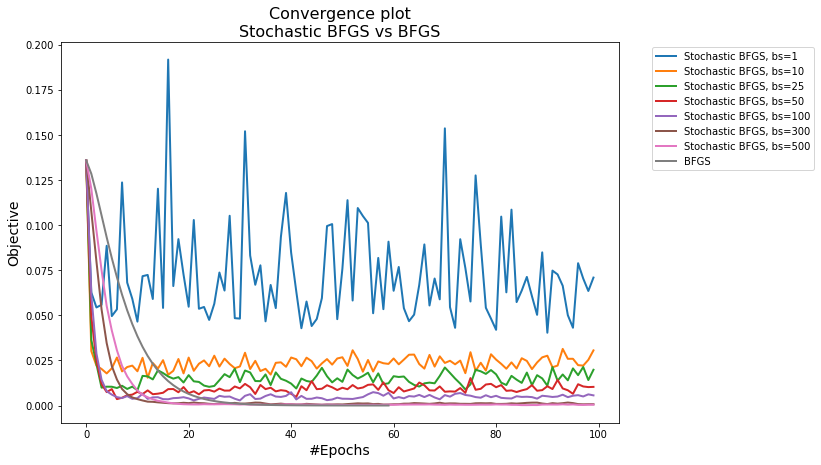

In [ ]:
batch_sizes = [1, 10, 25, 50, 100, 300, 500]
sto_bfgs_all_results = []

plt.figure(figsize=(10, 7))
for batch_size in batch_sizes:
    results = stochastic_BFGS(logregpb, w_init, Sk_size=batch_size, theta=0.1, c=1e-4, alpha=None, epochs=100, verbose=False, verbose_armijo=False)
    sto_bfgs_all_results.append(results)
    plt.plot(results["obj_vals"]-f_min_log, label="Stochastic BFGS, bs="+str(batch_size), lw=2)

bfgs_results = quasi_newton_BFGS(logregpb.f, logregpb.grad, w_init, theta=0.1, c=1e-4, max_iter=100, verbose=False, verbose_armijo=False)
plt.plot(bfgs_results["obj_vals"]-f_min_log, label="BFGS", lw=2)

plt.title("Convergence plot\nStochastic BFGS vs BFGS", fontsize=16)
plt.xlabel("#Epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

Using a batch size of 1 always lead to a lot of variance, as a unique data point cannot explain the whole dataset when approximating the gradient. For a batch size of 10 and above, the stochastic BFGS method converges. More precisely, for values in [100, 300, 500], the objective curve is smoother. Compared to BFGS, stochastic BFGS performs better when setting a batch size in [100, 300, 500].

If we also take a look at the convergence time, it took approximately the same time for the mentioned methods and batch size settings (between 10 and 13 seconds). So in this particular case (using the synthetic dataset), running stochastic BFGS is a better idea as it is less computationally expensive (less data points to approximate the gradient) and take the same time to converge as BFGS.

##### Stochastic L-BFGS vs L-BFGS

100%|██████████| 200/200 [00:11<00:00, 17.67it/s]

Newton's method has converged in 8 iteration(s).



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


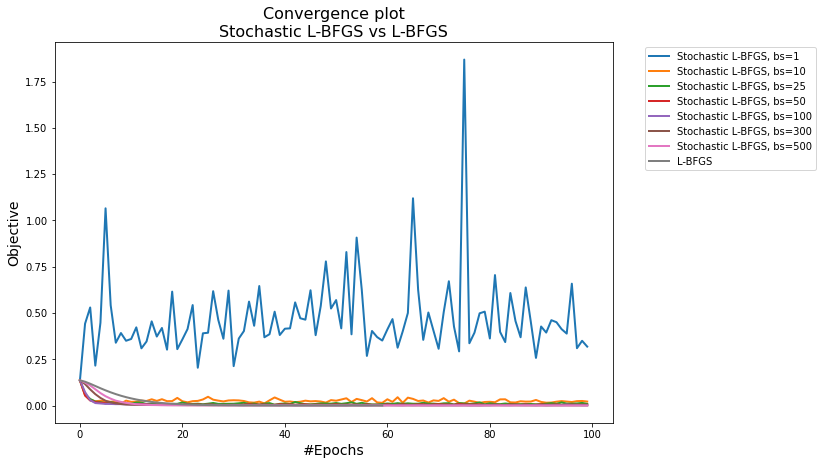

In [ ]:
batch_sizes = [1, 10, 25, 50, 100, 300, 500]
sto_lbfgs_all_results = []

plt.figure(figsize=(10, 7))
for batch_size in batch_sizes:
    results = stochastic_LBFGS(logregpb, w_init, m=5, Sk_size=batch_size, theta=0.1, c=1e-4, alpha=None, epochs=100, verbose=False, verbose_armijo=False)
    sto_lbfgs_all_results.append(results)
    plt.plot(results["obj_vals"]-f_min_log, label="Stochastic L-BFGS, bs="+str(batch_size), lw=2)

lbfgs_results = LBFGS_newton(logregpb.f, logregpb.grad, w_init, m=5, theta=0.1, c=1e-4, max_iter=100, verbose=False, verbose_armijo=False)
plt.plot(bfgs_results["obj_vals"]-f_min_log, label="L-BFGS", lw=2)

plt.title("Convergence plot\nStochastic L-BFGS vs L-BFGS", fontsize=16)
plt.xlabel("#Epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

Stochastic L-BFGS with a batch size of 1 behaves similarly to stochastic BFGS. 
We discard the blue curve to get a better view for other values.

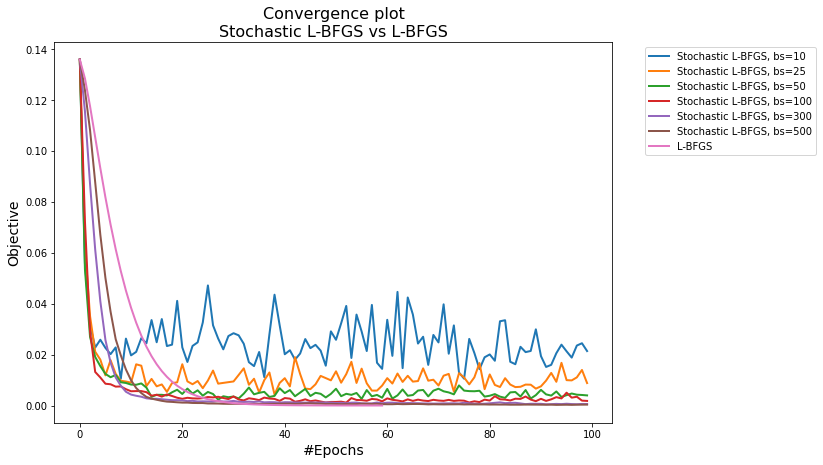

In [ ]:
plt.figure(figsize=(10,7))
for i in range(1, len(sto_lbfgs_all_results)):
    plt.plot(sto_lbfgs_all_results[i]["obj_vals"]-f_min_log, label="Stochastic L-BFGS, bs="+str(batch_sizes[i]), lw=2)

plt.plot(bfgs_results["obj_vals"]-f_min_log, label="L-BFGS", lw=2)

plt.title("Convergence plot\nStochastic L-BFGS vs L-BFGS", fontsize=16)
plt.xlabel("#Epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

As the batch size increases, the convergence is faster. For a batch size in [100, 300, 500], stochastic L-BFGS performs better than L-BFGS. In terms of convergence time, we can draw the same conclusion as BFGS version.

# Exercise 3. Binary classification on real-world data

## 3.1 Dataset

### __Implementation 3.1__ 
*Select a dataset from the libsvm repository. The dataset should have at least 20 features and 1,000 training samples.*

In [ ]:
import sklearn.datasets
from sklearn.linear_model import LogisticRegression

In [ ]:
!wget -c https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/mushrooms

--2022-02-27 18:25:31--  https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/mushrooms
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 879712 (859K)
Saving to: ‘mushrooms’

mushrooms           100%[===================>] 859.09K   921KB/s    in 0.9s    

2022-02-27 18:25:34 (921 KB/s) - ‘mushrooms’ saved [879712/879712]


In [ ]:
def get_data(sparse=True):
    data = sklearn.datasets.load_svmlight_file("mushrooms")
    if sparse:
        return data[0], data[1]
    else:
        return data[0].A, data[1]

X, y = get_data(sparse=False)

In [ ]:
print(X.shape, y.shape)

(8124, 112) (8124,)


In [ ]:
type(X)

numpy.ndarray

In [ ]:
X[0]

array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [ ]:
y[:10]

array([1., 2., 2., 1., 2., 2., 2., 2., 1., 2.])

## 3.2 Optimization problem

### __Implementation 3.2__ 
*Given your dataset, implement the associated codes for $g_{\mathcal{S}}$, $\nabla g_{\mathcal{S}}$ and $\nabla^2 g_{\mathcal{S}}$, where $\mathcal{S}$ is a set of random indices in $\{1, ..., n\}$.*

In [ ]:
class SigLogRegPb(object):

    def __init__(self, X, y, lbda=0):
        self.X = X
        self.y = y
        self.n, self.d = X.shape
        self.lbda = lbda

    # Objective value (scalar)
    def f(self, w):
        func_value = 0
        for i in range(self.n):
            func_value += self.fi(w, i)
        return func_value / self.n

    # Partial objective value (scalar)
    def fi(self, w, i):
        xiw = self.X[i] @ w
        res = (self.y[i] - 1. / (1. + np.exp(-xiw))) ** 2  + self.lbda * norm(w) ** 2 / 2.
        return res

    def grad(self, w):
        func_value = 0
        for i in range(self.n):
            func_value += self.grad_fi(w, i)
        return func_value / self.n

    # Partial gradient (112, )
    def grad_fi(self, w, i):
        x_i = self.X[i]
        y_i = self.y[i]
        exp_xiw = np.exp(x_i @ w)
        num = -2*exp_xiw*(exp_xiw*(y_i-1) + y_i)
        den = (1+exp_xiw)**3
        grad = (num/den) * x_i
        return grad

    # Partial hessian
    def hess_fi(self, w, i):
        x_i = self.X[i].reshape((self.d, 1))
        y_i = self.y[i]
        exp_xiw = np.exp(x_i.T @ w)[0]
        xx = np.dot(x_i, x_i.T)
        num = 2*exp_xiw*(exp_xiw*(y_i-1) + 2*exp_xiw-y_i)
        den = (1+exp_xiw)**4
        hess = (num/den) * xx
        return hess

    def get_batch(self, size):
        return np.random.choice(range(self.n), size=size, replace=False)

    def func_batch(self, func, batch, w):
        return np.mean([func(w, i) for i in batch], axis=0)

## 3.3 Comparison of the algorithms

### __Question 3.1__ 

*Compare the performance of the subsampling Newton method from Section 2.1 and
that of the stochastic quasi-Newton method of Section 2.2 with a (batch) stochastic gradient approach. You may reuse the stochastic gradient implementation from the course notebooks.*

In [ ]:
n, d = X.shape
w_init_sig = np.zeros(d)
lbda = 0
siglogregpb = SigLogRegPb(X, y, lbda=lbda)

In [ ]:
from scipy.optimize import fmin_l_bfgs_b # Efficient optimizer

# Starting point
w_init_sig = np.zeros(d)

# Compute the optimal solution for logistic regression
w_min_log, f_min_log, _ = fmin_l_bfgs_b(siglogregpb.f, w_init_sig, siglogregpb.grad, args=(), pgtol=1e-30, factr =1e-30)

print(f_min_log)

0.517971442639094


100%|██████████| 4050/4050 [12:00<00:00,  5.62it/s]


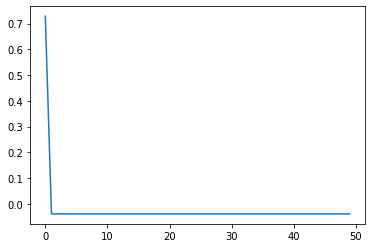

In [ ]:
# Stochastic Quasi-Newton 
results_sto_bfgs = stochastic_BFGS(siglogregpb, w_init_sig, Sk_size=100, theta=0.1, c=1e-4, alpha=None, epochs=50, verbose=False, verbose_armijo=False)
plt.plot(results_sto_bfgs["obj_vals"]-f_min_log)

The stochastic BFGS method converges rapidly.

In [ ]:
# Subsampling armijo 0.5
results_sub = subsampling_newton(siglogregpb, w_init_sig, theta=0.5, c=1e-4, Sk_size=100, SkH_size=100, alpha=None, epochs=1, verbose=True)
#plt.plot(results_sub["obj_vals"]-f_min_log)

  0%|          | 0/40 [00:00<?, ?it/s]

[0]: w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], f(w)=1.2859e+00
Subsampling Hessian matrix at w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] is not invertible.


I did not manage to make the subsampling algorithm work on the real-world data. I faced the following difficulties:
1. Working without csr_matrix dtype (so with a numpy array filled of 0s): I first tried to load the data as a numpy array (showed in the notebook), and wrote the function, its gradient and hessian based on the fact that we are manipulating numpy arrays. The first difficulty that I encountered was starting with the initial point filled of 0s, the subsampling hessian matrix was not invertible after 1 step. To remedy, I tried multiple random initial points, but I got the same results. I also tried a globalized version of the subsampling Newton method (similar to Section 1.2), but computing the eigenvalues of the hessian raised errors.
2. Working with csr_matrix dtype: I would encountered many types of errors (eigenvalues related, hessian matrix filled of NaN values...)
The choice of the starting point is also very important here, and I did not manage to find a good one so that the method runs.

##### csr_matrix

In [ ]:
import scipy.sparse
from scipy.sparse import vstack

In [ ]:
class SigLogRegPb_CSR(object):

    def __init__(self, X, y, lbda=0):
        self.X = X
        self.y = y
        self.n, self.d = X.shape
        self.lbda = lbda

    # Objective value
    def f(self, w):
        func_value = 0
        for i in range(self.n):
            func_value += self.fi(w, i)
        return func_value[0] / self.n

    # Partial objective value
    def fi(self, w, i):
        xiw = self.X[i] @ w
        res = (self.y[i] - 1. / (1. + np.exp(-xiw))) ** 2  + self.lbda * norm(w) ** 2 / 2.
        return res

    # Partial gradient
    def grad_fi(self, w, i):
        x_i = self.X[i]
        y_i = self.y[i]
        exp_xiw = np.exp(x_i @ w)
        num = -2*exp_xiw*(exp_xiw*(y_i-1) + y_i)
        den = (1+exp_xiw)**3
        grad = (num[0]/den[0]) * x_i
        return grad

    # Partial hessian
    def hess_fi(self, w, i):
        x_i = self.X[i]
        y_i = self.y[i]
        exp_xiw = np.exp(x_i @ w)
        xx = np.dot(x_i.T, x_i)
        num = 2*exp_xiw*(exp_xiw*(y_i-1) + 2*exp_xiw-y_i)
        den = (1+exp_xiw)**4
        hess = (num[0]/den[0]) * xx
        return hess

    def get_batch(self, size):
        return np.random.choice(range(self.n), size=size, replace=False)

    def func_batch(self, func, batch, w):
        if func=="grad_fi":
            return np.mean(vstack([self.grad_fi(w, i) for i in batch]), axis=0)

        if func=="hess_fi":
            matrix_result = scipy.sparse.csr_matrix((self.d, self.d))
            for i in batch:
                matrix_result += self.hess_fi(w, i)
            return matrix_result / len(batch)

In [ ]:
def subsampling_armijo(logregpb, wk, dk, Sk, theta, c, max_iter=10, verbose=False):
    alpha = theta
    gwk = logregpb.func_batch(logregpb.grad_fi, Sk, wk)
    f_Sk_wk = logregpb.func_batch(logregpb.fi, Sk, wk)
    for i in range(max_iter):
        new_w = wk + alpha * dk
        f_Sk_new_w = logregpb.func_batch(logregpb.fi, Sk, new_w)
        if f_Sk_new_w < f_Sk_wk + c*alpha*(dk.T @ gwk):
            if verbose:
                print(f'    subsampling armijo: {i}, alpha={alpha}')
            return alpha
        alpha = alpha * theta
    if verbose:
        print(f'    subsampling armijo has not converged. alpha={alpha}')
    return alpha

def subsampling_newton(logregpb, w0, theta, c, Sk_size, SkH_size, alpha=None, type_alpha='lipgrad', epochs=100, verbose=False, max_iter_armijo=10, verbose_armijo=False):
    
    # Initialisation
    wk = w0
    num_iter_per_epoch = logregpb.n // (Sk_size + SkH_size)
    max_iter = epochs * num_iter_per_epoch

    # Dict to store results
    results = {}
    results["w_sols"] = [w0] # Solution history
    results["obj_vals"] = [] # Objective value history

    for k in tqdm(range(max_iter)):

        # Compute objective value at wk
        fwk = logregpb.f(wk)
        if k % num_iter_per_epoch == 0:
            results["obj_vals"].append(fwk)

        # Print relevant information if verbose=True
        if verbose:
            print(f"[{k}]: w={wk}, f(w)={fwk:.4e}")

        # Create batches
        Sk = logregpb.get_batch(Sk_size)
        SkH = logregpb.get_batch(SkH_size)

        # Compute subsampling gradient and hessian
        gwk = logregpb.func_batch("grad_fi", Sk, wk)
        hwk = logregpb.func_batch("hess_fi", SkH, wk)

        # Compute lambda_k
        eig_vals = scipy.sparse.linalg.eigs(hwk)
        lambda_k = 2*max(-min(eig_vals), 1e-10)
       
        # Compute the inverse matrix
        try:
            inv_hwk = np.linalg.inv(hwk + lambda_k*np.eye(len(w0)))
        except Exception as e:
            print(f"Subsampling Hessian matrix at w={wk} is not invertible.")
            results["num_iterations"] = k
            results["final_obj_val"] = fwk
            results["wn"] = wk
            return results

        # Compute the direction
        dk = -inv_hwk @ gwk

        # Compute step size
        if alpha:  
            # Constant step size divided by the Lipchitz constant of the gradient (provided as argument)
            if type_alpha == 'lipgrad': 
                alpha_k = alpha
            # Step size divided by the Lipchitz constant of the subsampling hessian
            if type_alpha == 'lipgradbatch':
                alpha_k = alpha / logregpb.lipgradbatch(Sk)
        else:
            alpha_k = subsampling_armijo(logregpb, wk, dk, Sk, theta, c, max_iter=max_iter_armijo, verbose=verbose_armijo)
        
        # Update subsampling iteration
        wk = wk + alpha_k*dk
        if k % num_iter_per_epoch == 0:
            results["w_sols"].append(wk)

    print(f"\nFinish {epochs} epochs = {epochs * num_iter_per_epoch} iterations ({num_iter_per_epoch} iterations/epoch).")
    results["num_iterations"] = k
    results["final_obj_val"] = fwk
    results["wn"] = wk
    return results

In [ ]:
X_csr, y_csr = get_data(sparse=True)

In [ ]:
type(X_csr)

scipy.sparse.csr.csr_matrix

In [ ]:
siglogregpb_csr = SigLogRegPb_CSR(X_csr, y_csr, lbda=lbda)

In [ ]:
# Subsampling armijo 0.5
results_sub = subsampling_newton(siglogregpb_csr, w_init_sig, theta=0.5, c=1e-4, Sk_size=100, SkH_size=100, alpha=None, epochs=1, verbose=True)
#plt.plot(results_sub["obj_vals"]-f_min_log)

  0%|          | 0/40 [00:01<?, ?it/s]

[0]: w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], f(w)=1.2859e+00


ValueError: ignored